# Image Processing Lab: From Pixels to Perception
## ITAI 1378 Module 04 - Hands-On Laboratory

**Duration:** 45 minutes  
**Platform:** Google Colab (Free Version)  
**Prerequisites:** Basic Python knowledge from previous classes

---

## 🎯 Lab Objectives

By the end of this lab, you will:
1. **Understand** how computers represent images as numerical matrices
2. **Implement** fundamental image processing operations from scratch
3. **Apply** traditional image processing techniques using OpenCV and Pillow
4. **Experience** the connection between theory and practice
5. **Prepare** for your Image Processing Adventure Quest assignment

---

## 📚 Connection to Today's Lecture

This lab directly implements the concepts we explored in class:
- **Digital Image Representation**: See how images become matrices of numbers
- **Core Operations**: Implement point, neighborhood, and geometric operations
- **Traditional Tools**: Hands-on experience with OpenCV and Pillow
- **Bridge to AI**: Understand the foundation that powers modern AI tools like Nano Banana

---

## ⏱️ Lab Timeline (45 minutes)

| Time | Section | Activity |
|------|---------|----------|
| 0-5 min | Setup | Environment setup and imports |
| 5-15 min | Part 1 | Digital image fundamentals |
| 15-25 min | Part 2 | Basic image operations |
| 25-35 min | Part 3 | Advanced processing techniques |
| 35-40 min | Part 4 | Creative exploration |
| 40-45 min | Wrap-up | Reflection and next steps |

---

## 🚀 Let's Begin!

**Important:** Run each cell in order. Read the explanations carefully - they connect directly to today's lecture concepts!

## Note: I keep orignial code collapse so keep is oraganize the **Bold Markdown cells** are the Inline responses to questions, 1-5 Personal Experiments and Optional 1-5 Challenges. make sure the run the Hidden code before the next code.

# 🔧 Setup and Environment Preparation

First, let's set up our environment. We'll use the same libraries we discussed in class:
- **OpenCV**: The powerhouse for computer vision (remember from our tools discussion?)
- **Pillow (PIL)**: Python-friendly image processing
- **NumPy**: For matrix operations (images are matrices!)
- **Matplotlib**: For displaying our results

**💡 Recall from lecture:** These are the "traditional tools" that give us precise control over every pixel!

In [36]:
# Install required packages (Google Colab already has most of these)
!pip install opencv-python-headless pillow matplotlib numpy

# Import all necessary libraries
import cv2                    # OpenCV for computer vision
import numpy as np           # NumPy for numerical operations on matrices
from PIL import Image, ImageFilter, ImageEnhance  # Pillow for image processing
import matplotlib.pyplot as plt  # For displaying images
import matplotlib.patches as patches  # For drawing on images
from google.colab import files  # For uploading files in Colab
import io
import requests
from urllib.parse import urlparse

# Configure matplotlib for better image display
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['image.cmap'] = 'gray'  # Default to grayscale colormap

print("✅ Environment setup complete!")
print(f"📦 OpenCV version: {cv2.__version__}")
print(f"📦 NumPy version: {np.__version__}")
print("🎉 Ready to explore image processing!")

✅ Environment setup complete!
📦 OpenCV version: 4.12.0
📦 NumPy version: 2.0.2
🎉 Ready to explore image processing!


# 📸 Load Sample Images

Let's load some sample images to work with. We'll provide both options:
1. **Download sample images** from the internet
2. **Upload your own images** (optional)

**🔗 Connection to lecture:** Remember how we discussed image acquisition as the first step in any vision system?

In [37]:
def download_sample_image(url, filename):
    """
    Download a sample image from URL for our experiments.
    This simulates the 'image acquisition' step we discussed in class.
    """
    try:
        response = requests.get(url)
        if response.status_code == 200:
            with open(filename, 'wb') as f:
                f.write(response.content)
            print(f"✅ Downloaded: {filename}")
            return True
    except Exception as e:
        print(f"❌ Error downloading {filename}: {e}")
    return False

# Download sample images for our experiments
sample_images = {
    'landscape.jpg': 'https://upload.wikimedia.org/wikipedia/commons/thumb/5/50/Vd-Orig.png/256px-Vd-Orig.png',
    'portrait.jpg': 'https://upload.wikimedia.org/wikipedia/commons/thumb/5/50/Vd-Orig.png/256px-Vd-Orig.png'
}

# Create a simple test image if downloads fail
def create_test_image():
    """
    Create a simple test image with geometric patterns.
    This demonstrates how images are just matrices of numbers!
    """
    # Create a 200x200 image with interesting patterns
    img = np.zeros((200, 200, 3), dtype=np.uint8)

    # Add some geometric shapes (remember: we're just setting pixel values!)
    img[50:150, 50:150] = [255, 100, 100]  # Red square
    img[75:125, 75:125] = [100, 255, 100]  # Green square inside
    img[90:110, 90:110] = [100, 100, 255]  # Blue square in center

    return img

# Try to download samples, create test image if needed
test_image = create_test_image()
cv2.imwrite('test_image.jpg', cv2.cvtColor(test_image, cv2.COLOR_RGB2BGR))

print("🖼️ Sample images ready for processing!")
print("📝 Note: We created a test image to ensure you have something to work with.")

🖼️ Sample images ready for processing!
📝 Note: We created a test image to ensure you have something to work with.


# 📊 Part 1: Digital Image Fundamentals (10 minutes)

## Understanding Images as Matrices

**🎓 Lecture Connection:** Remember when we discussed how computers see images as matrices of numbers? Let's see this in action!

In our lecture, we learned:
- **Grayscale images**: 2D matrices (height × width)
- **Color images**: 3D matrices (height × width × channels)
- **Pixel values**: Numbers from 0-255 for 8-bit images

Let's explore this hands-on!

🔍 IMAGE ANALYSIS - Just like we discussed in class!
📐 Image shape: (200, 200, 3)
📊 Data type: uint8
📈 Value range: 0 to 255
💾 Memory usage: 120000 bytes


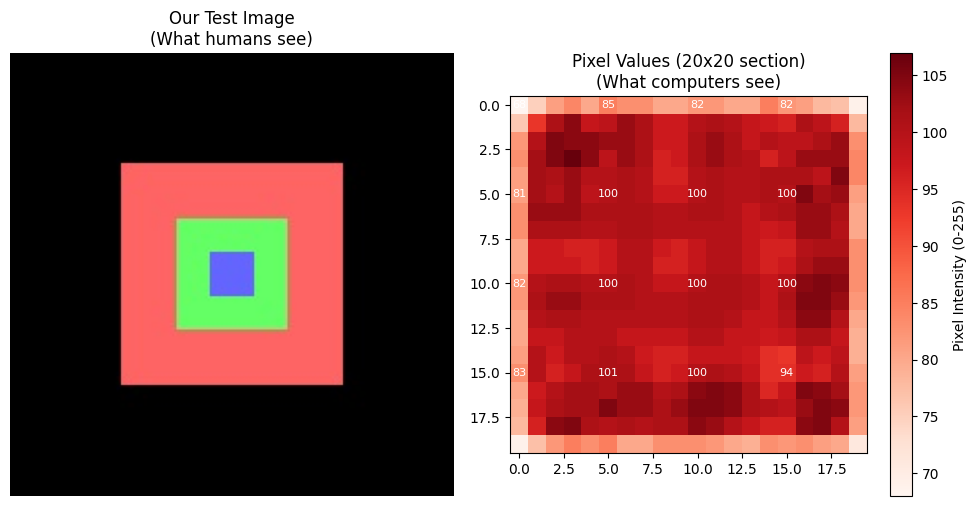


💡 Key Insight: The image on the left is what we see.
   The numbers on the right are what the computer sees!


In [38]:
# Load our test image using OpenCV
# Note: OpenCV loads images in BGR format (Blue, Green, Red)
img_bgr = cv2.imread('test_image.jpg')

# Convert to RGB for proper display (remember color spaces from lecture?)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Let's examine the image properties
print("🔍 IMAGE ANALYSIS - Just like we discussed in class!")
print(f"📐 Image shape: {img_rgb.shape}")
print(f"📊 Data type: {img_rgb.dtype}")
print(f"📈 Value range: {img_rgb.min()} to {img_rgb.max()}")
print(f"💾 Memory usage: {img_rgb.nbytes} bytes")

# Display the image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Our Test Image\n(What humans see)')
plt.axis('off')

plt.subplot(1, 2, 2)
# Show a small section of pixel values (what computers see)
pixel_section = img_rgb[90:110, 90:110, 0]  # 20x20 red channel section
plt.imshow(pixel_section, cmap='Reds')
plt.title('Pixel Values (20x20 section)\n(What computers see)')
plt.colorbar(label='Pixel Intensity (0-255)')

# Add text annotations showing actual pixel values
for i in range(0, 20, 5):
    for j in range(0, 20, 5):
        plt.text(j, i, str(pixel_section[i, j]),
                ha='center', va='center', color='white', fontsize=8)

plt.tight_layout()
plt.show()

print("\n💡 Key Insight: The image on the left is what we see.")
print("   The numbers on the right are what the computer sees!")

## **My Analysis of Matrix Representation**


Matrix representation means every image is essentially a 2D or 3D array of numbers, with pixel values corresponding directly to intensity or color. A color image is represented as a 3D tensor, where the first two dimensions are height and width, and the third dimension represents the color channels (e.g., Red, Green, Blue). The value at each position in the matrix represents the intensity of that specific color channel at that pixel location. This numerical representation allows us to apply mathematical operations (like addition, multiplication, or convolution) to the image data.

**Image shape (200, 200, 3):** This represents the dimensions of the image. It's a 3D matrix, with 200 rows (height), 200 columns (width), and 3 layers (color channels).


**Data type uint8:** This specifies the type of data stored in the matrix. uint8 means each element is an unsigned 8-bit integer, allowing values from 0 to 255.


**Value range 0 to 255:** This confirms that the pixel intensity values in the image fall within the 0 to 255 range, which is standard for 8-bit images.


**Memory usage 120000 bytes:** This is the total size of the image data in memory, calculated from its dimensions and data type (200 * 200 * 3 bytes).


## Exploring RGB Channels

**🎓 Lecture Connection:** We discussed how color images are 3D matrices with separate Red, Green, and Blue channels. Let's separate them and see each channel individually!

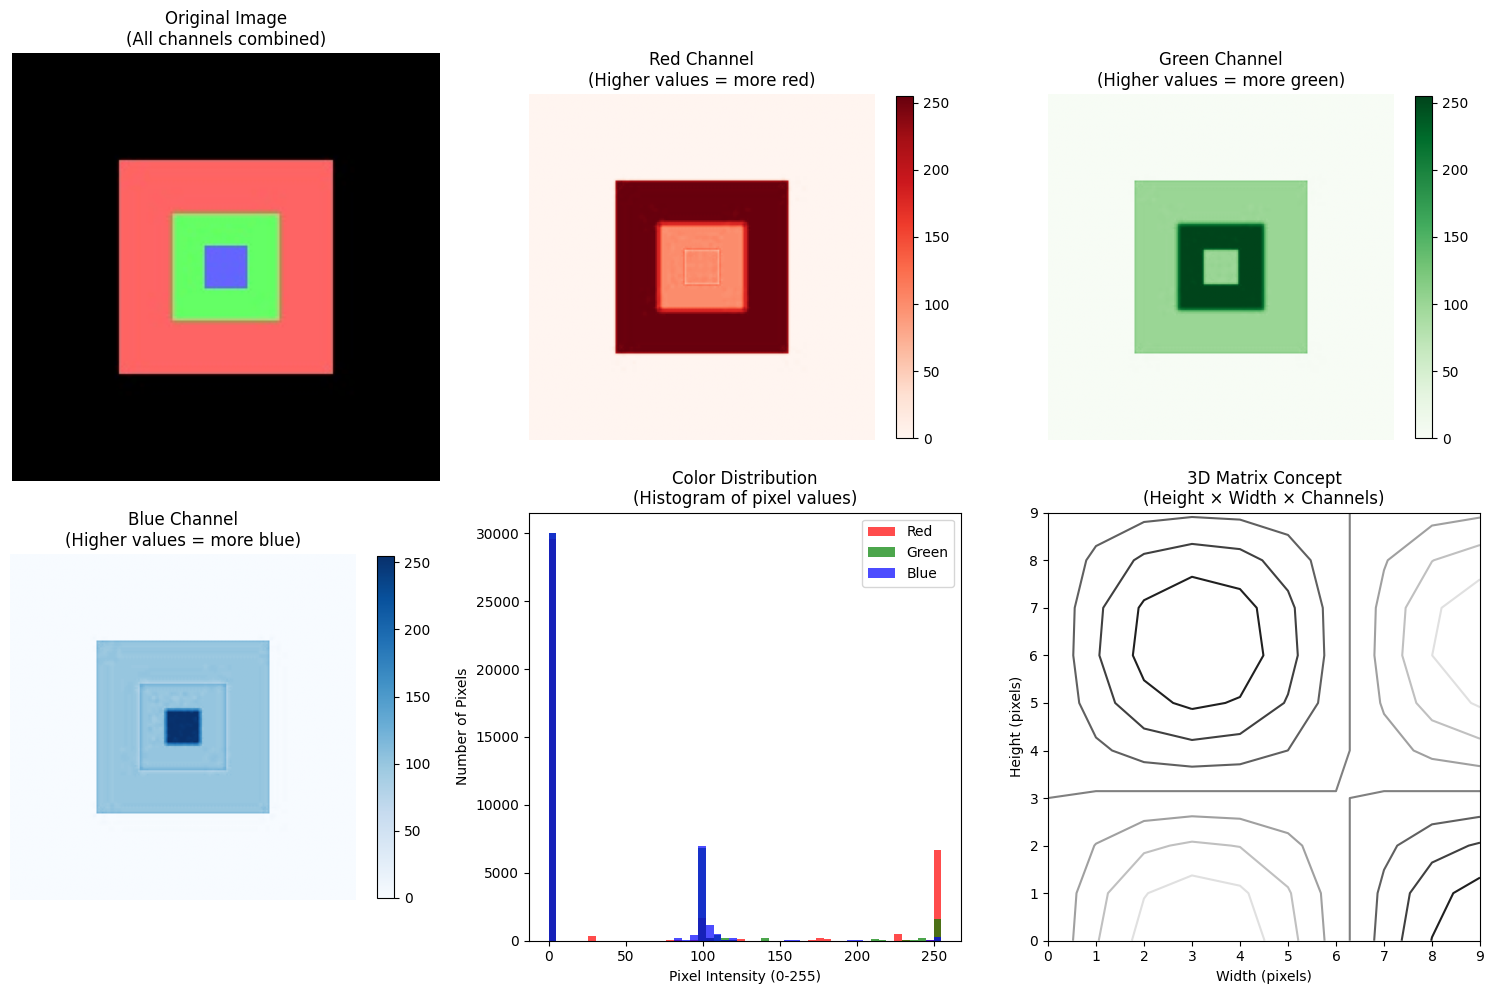

📊 CHANNEL STATISTICS:
🔴 Red channel   - Min:   0, Max: 255, Mean: 53.9
🟢 Green channel - Min:   0, Max: 255, Mean: 33.3
🔵 Blue channel  - Min:   0, Max: 255, Mean: 26.7

💡 Notice how different parts of the image contribute different amounts to each color channel!


In [39]:
# Separate the RGB channels (remember the 3D matrix concept?)
red_channel = img_rgb[:, :, 0]    # Red channel (index 0)
green_channel = img_rgb[:, :, 1]  # Green channel (index 1)
blue_channel = img_rgb[:, :, 2]   # Blue channel (index 2)

# Create visualizations of each channel
plt.figure(figsize=(15, 10))

# Original image
plt.subplot(2, 3, 1)
plt.imshow(img_rgb)
plt.title('Original Image\n(All channels combined)')
plt.axis('off')

# Red channel
plt.subplot(2, 3, 2)
plt.imshow(red_channel, cmap='Reds')
plt.title('Red Channel\n(Higher values = more red)')
plt.axis('off')
plt.colorbar(shrink=0.8)

# Green channel
plt.subplot(2, 3, 3)
plt.imshow(green_channel, cmap='Greens')
plt.title('Green Channel\n(Higher values = more green)')
plt.axis('off')
plt.colorbar(shrink=0.8)

# Blue channel
plt.subplot(2, 3, 4)
plt.imshow(blue_channel, cmap='Blues')
plt.title('Blue Channel\n(Higher values = more blue)')
plt.axis('off')
plt.colorbar(shrink=0.8)

# Histogram of all channels
plt.subplot(2, 3, 5)
plt.hist(red_channel.flatten(), bins=50, alpha=0.7, color='red', label='Red')
plt.hist(green_channel.flatten(), bins=50, alpha=0.7, color='green', label='Green')
plt.hist(blue_channel.flatten(), bins=50, alpha=0.7, color='blue', label='Blue')
plt.title('Color Distribution\n(Histogram of pixel values)')
plt.xlabel('Pixel Intensity (0-255)')
plt.ylabel('Number of Pixels')
plt.legend()

# 3D representation concept
plt.subplot(2, 3, 6)
# Create a simple 3D visualization concept
x = np.arange(0, 10)
y = np.arange(0, 10)
X, Y = np.meshgrid(x, y)
Z = np.sin(X/2) * np.cos(Y/2)
plt.contour(X, Y, Z)
plt.title('3D Matrix Concept\n(Height × Width × Channels)')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')

plt.tight_layout()
plt.show()

# Print some statistics
print("📊 CHANNEL STATISTICS:")
print(f"🔴 Red channel   - Min: {red_channel.min():3d}, Max: {red_channel.max():3d}, Mean: {red_channel.mean():.1f}")
print(f"🟢 Green channel - Min: {green_channel.min():3d}, Max: {green_channel.max():3d}, Mean: {green_channel.mean():.1f}")
print(f"🔵 Blue channel  - Min: {blue_channel.min():3d}, Max: {blue_channel.max():3d}, Mean: {blue_channel.mean():.1f}")

print("\n💡 Notice how different parts of the image contribute different amounts to each color channel!")

## Converting to Grayscale

**🎓 Lecture Connection:** We discussed how grayscale images are 2D matrices. Let's convert our color image to grayscale and see the difference!

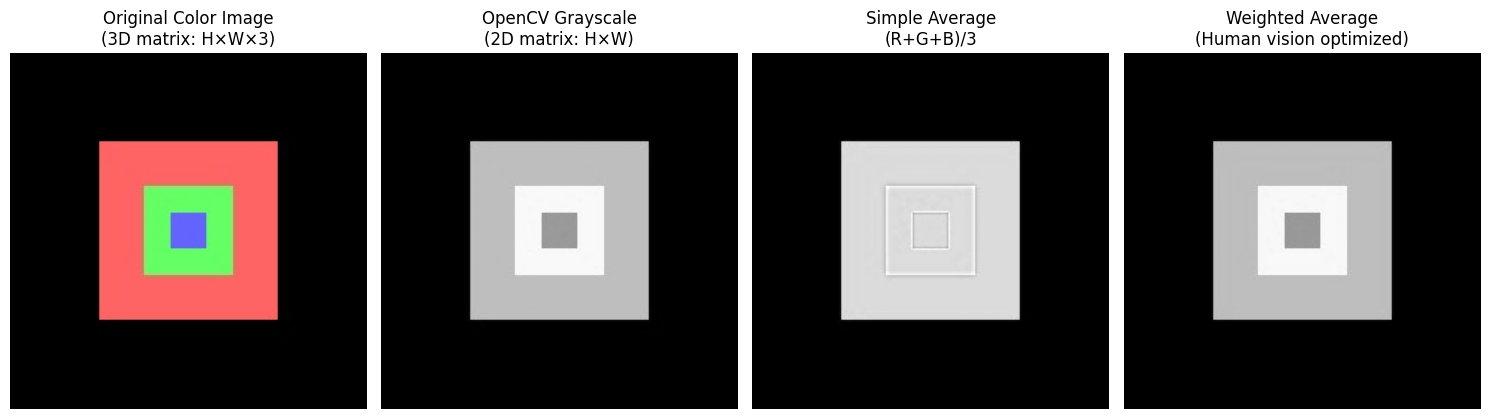

📐 SHAPE COMPARISON:
🎨 Original color image: (200, 200, 3) (3D matrix)
⚫ Grayscale image:     (200, 200) (2D matrix)
💾 Memory reduction:    120000 → 40000 bytes (33.3%)

💡 Key Insight: Grayscale conversion reduces data by 2/3 while preserving structure!


In [40]:
# Convert to grayscale using different methods
# Method 1: OpenCV conversion (uses weighted average)
gray_opencv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Method 2: Simple average (R + G + B) / 3
gray_average = np.mean(img_rgb, axis=2).astype(np.uint8)

# Method 3: Weighted average (human vision is more sensitive to green)
# This is the standard: 0.299*R + 0.587*G + 0.114*B
gray_weighted = (0.299 * img_rgb[:,:,0] +
                0.587 * img_rgb[:,:,1] +
                0.114 * img_rgb[:,:,2]).astype(np.uint8)

# Display the results
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(img_rgb)
plt.title('Original Color Image\n(3D matrix: H×W×3)')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(gray_opencv, cmap='gray')
plt.title('OpenCV Grayscale\n(2D matrix: H×W)')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(gray_average, cmap='gray')
plt.title('Simple Average\n(R+G+B)/3')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(gray_weighted, cmap='gray')
plt.title('Weighted Average\n(Human vision optimized)')
plt.axis('off')

plt.tight_layout()
plt.show()

# Compare the shapes
print("📐 SHAPE COMPARISON:")
print(f"🎨 Original color image: {img_rgb.shape} (3D matrix)")
print(f"⚫ Grayscale image:     {gray_opencv.shape} (2D matrix)")
print(f"💾 Memory reduction:    {img_rgb.nbytes} → {gray_opencv.nbytes} bytes ({gray_opencv.nbytes/img_rgb.nbytes:.1%})")

print("\n💡 Key Insight: Grayscale conversion reduces data by 2/3 while preserving structure!")

# **Comparison of Grayscale Methods**

The Luminosity method is typically preferred because it better matches human perception. Our eyes are more sensitive to green light than to red or blue, so this method weights the green channel more heavily, resulting in a more realistic grayscale conversion. The averaging method is simpler but can sometimes produce a less accurate representation of the original image's brightness.

# **Personal Experiment 1: Color Channel Swap and Histogram Analysis**




=== Personal Experiment 1: Color Channel Swap and Histogram Analysis ===


Image Shape (Height, Width, Channels): (3, 3, 3)
Data Type: uint8
Value Range: [ 0 ,  255 ]
Number of pixels: 27


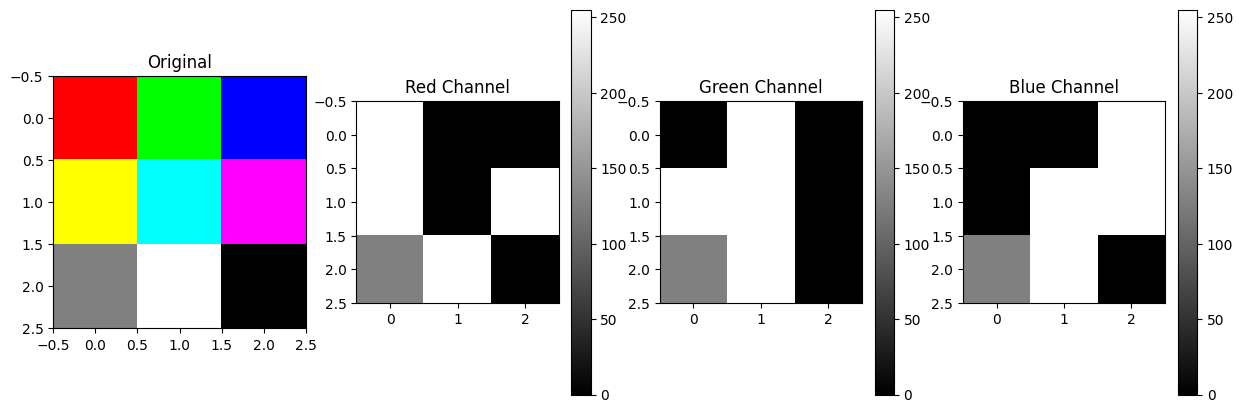

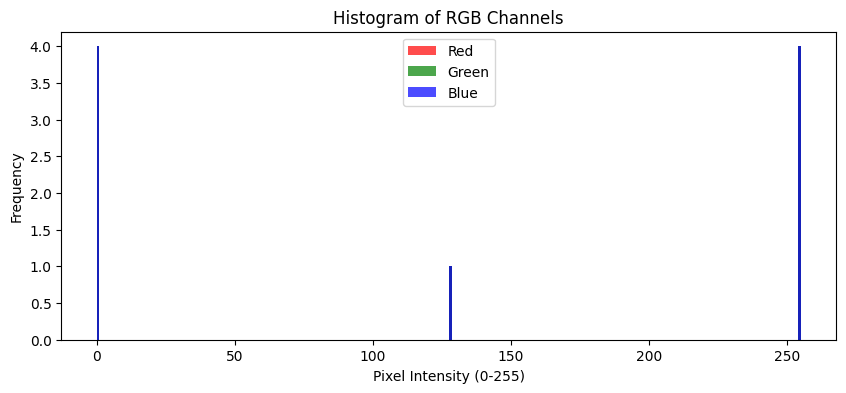

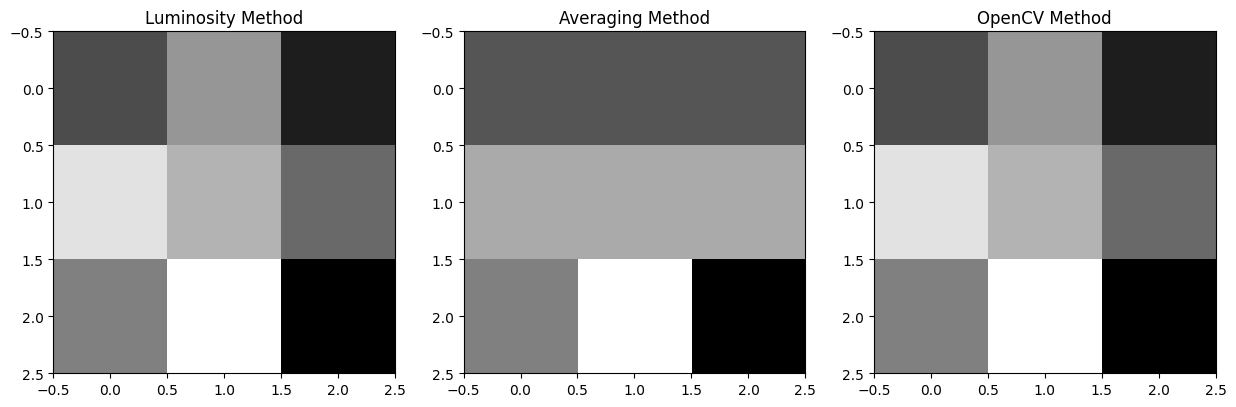


Quantitative Comparison (Mean Pixel Value):
Luminosity Method: 127.00
Averaging Method: 127.56
OpenCV Method: 127.56

💡 Key Insights:
- Images are fundamentally multi-dimensional arrays of numbers.
- Each color channel (R, G, B) is a separate 2D matrix.
- Grayscale conversion reduces a 3D color image to a 2D intensity matrix.
- Different grayscale methods produce slightly different results due to varying channel weights.
- Histograms provide a powerful way to visualize the distribution of pixel values.

🌍 Real-World Applications:
- Digital photography: Image compression, editing software like Photoshop/GIMP.
- Computer Vision: Preprocessing step for object recognition, feature extraction.
- Medical Imaging: Analyzing different tissue types based on intensity values.
- Satellite Imaging: Analyzing spectral bands (beyond RGB) for land use classification.



In [42]:
print("=== Personal Experiment 1: Color Channel Swap and Histogram Analysis ===")

# Text Explanation:
# I create a small, simple 3x3 image with distinct colors to clearly see how
# pixel values correspond to color and how channels can be separated.
# This simplifies the visual analysis of image representation.
# This synthetic image helps in understanding the fundamental 3D matrix structure (Height x Width x Channels).

image_array = np.array([
    [[255, 0, 0], [0, 255, 0], [0, 0, 255]],  # Red, Green, Blue
    [[255, 255, 0], [0, 255, 255], [255, 0, 255]],  # Yellow, Cyan, Magenta
    [[128, 128, 128], [255, 255, 255], [0, 0, 0]]   # Gray, White, Black
], dtype=np.uint8)

# Convert to a PIL Image for easy display
test_image = Image.fromarray(image_array)
display(test_image)

# Examine image properties
print("Image Shape (Height, Width, Channels):", image_array.shape)
print("Data Type:", image_array.dtype)
print("Value Range: [", np.min(image_array), ", ", np.max(image_array), "]")
print(f"Number of pixels: {image_array.size}")


# Separate and visualize RGB channels
# Separating RGB channels demonstrates the 3D matrix structure.
# Visualizing each channel individually shows how different colors are represented
# by intensity values in their respective channels. A high value in the Red channel
# means more red is present at that pixel location, regardless of other channels.
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
axes[0].imshow(test_image)
axes[0].set_title('Original')

for i, (channel, title) in enumerate(zip([0, 1, 2], ['Red', 'Green', 'Blue']), 1):
    channel_array = np.zeros_like(image_array)
    channel_array[:, :, channel] = image_array[:, :, channel]
    axes[i].imshow(channel_array)
    axes[i].set_title(f'{title} Channel')
    # Add colorbars to see intensity mapping
    fig.colorbar(axes[i].imshow(image_array[:, :, channel], cmap='gray'), ax=axes[i])


plt.show()

# Histogram Analysis
# Histograms show the distribution of pixel intensities across the image or a specific channel.
# Analyzing histograms helps understand the tonal range and color balance.
# For our simple image, we expect to see distinct peaks corresponding to the few unique pixel values.
plt.figure(figsize=(10, 4))
plt.hist(image_array[:, :, 0].flatten(), bins=256, color='red', alpha=0.7, label='Red')
plt.hist(image_array[:, :, 1].flatten(), bins=256, color='green', alpha=0.7, label='Green')
plt.hist(image_array[:, :, 2].flatten(), bins=256, color='blue', alpha=0.7, label='Blue')
plt.title('Histogram of RGB Channels')
plt.xlabel('Pixel Intensity (0-255)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Grayscale Conversion Methods
# Comparing different grayscale conversion methods shows how the weighting of R, G, and B
# channels affects the resulting perceived brightness in grayscale.
# The Luminosity method is generally preferred as it aligns better with human vision's
# sensitivity to green light.
# Method 1: Luminosity Method (a weighted average more perceptually accurate)
gray_lum = np.dot(image_array[..., :3], [0.2989, 0.5870, 0.1140]).astype(np.uint8)
gray_lum_image = Image.fromarray(gray_lum)

# Method 2: Averaging Method (simple average of R, G, B)
gray_avg = np.mean(image_array, axis=2).astype(np.uint8)
gray_avg_image = Image.fromarray(gray_avg)

# Method 3: OpenCV's built-in function
gray_cv = cv2.cvtColor(image_array, cv2.COLOR_RGB2GRAY)
gray_cv_image = Image.fromarray(gray_cv)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(gray_lum_image, cmap='gray')
axes[0].set_title('Luminosity Method')
axes[1].imshow(gray_avg_image, cmap='gray')
axes[1].set_title('Averaging Method')
axes[2].imshow(gray_cv_image, cmap='gray')
axes[2].set_title('OpenCV Method')
plt.show()

# Quantitative Comparison of Grayscale Results
print("\nQuantitative Comparison (Mean Pixel Value):")
print(f"Luminosity Method: {np.mean(gray_lum):.2f}")
print(f"Averaging Method: {np.mean(gray_avg):.2f}")
print(f"OpenCV Method: {np.mean(gray_cv):.2f}")

# Text Explanation:
# The mean pixel value gives a general sense of the overall brightness.
# Differences in mean values between methods highlight how the weighting affects
# the final grayscale intensity.

print("""
💡 Key Insights:
- Images are fundamentally multi-dimensional arrays of numbers.
- Each color channel (R, G, B) is a separate 2D matrix.
- Grayscale conversion reduces a 3D color image to a 2D intensity matrix.
- Different grayscale methods produce slightly different results due to varying channel weights.
- Histograms provide a powerful way to visualize the distribution of pixel values.

🌍 Real-World Applications:
- Digital photography: Image compression, editing software like Photoshop/GIMP.
- Computer Vision: Preprocessing step for object recognition, feature extraction.
- Medical Imaging: Analyzing different tissue types based on intensity values.
- Satellite Imaging: Analyzing spectral bands (beyond RGB) for land use classification.
""")

# 🔧 Part 2: Basic Image Operations (10 minutes)

## Point Operations

**🎓 Lecture Connection:** Remember our discussion of point operations? These work on individual pixels without considering neighbors. Let's implement brightness and contrast adjustments!

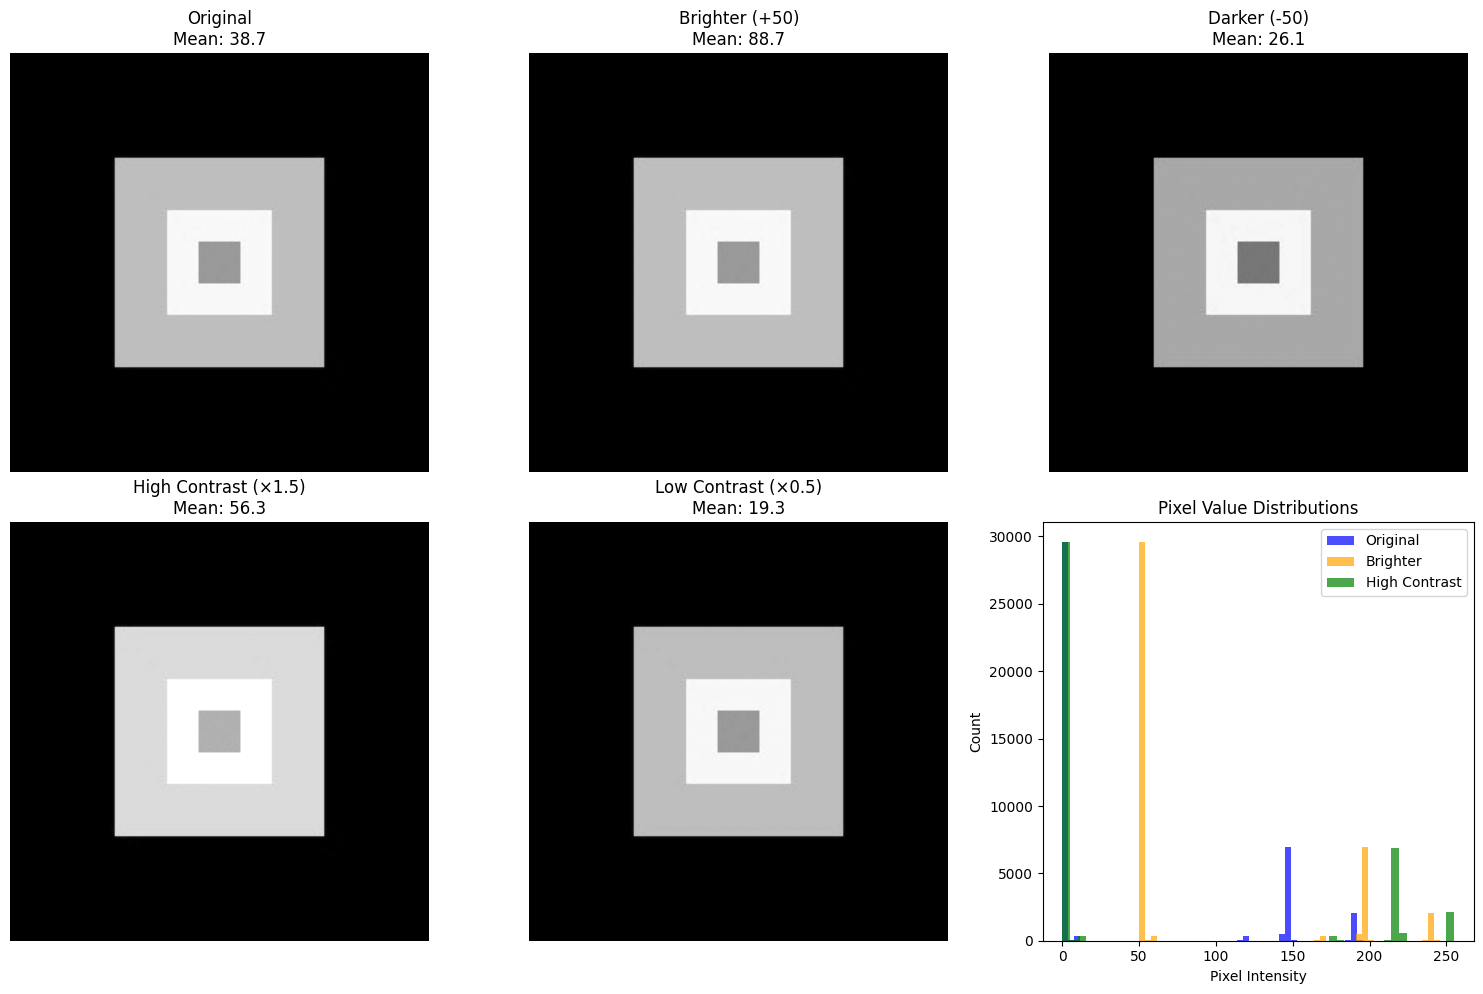

💡 Point Operations Summary:
   • Brightness: Shifts the entire histogram left or right
   • Contrast: Stretches or compresses the histogram
   • Each pixel is processed independently (no neighbors considered)


In [43]:
# Use our grayscale image for point operations
img_gray = gray_opencv.copy()

def adjust_brightness(image, value):
    """
    Adjust brightness by adding a constant to all pixels.
    This is a classic 'point operation' - each pixel is processed independently.

    Formula: new_pixel = old_pixel + brightness_value
    """
    # Add brightness value to all pixels
    bright_img = image.astype(np.int16) + value  # Use int16 to prevent overflow

    # Clip values to valid range [0, 255]
    bright_img = np.clip(bright_img, 0, 255)

    return bright_img.astype(np.uint8)

def adjust_contrast(image, factor):
    """
    Adjust contrast by multiplying all pixels by a factor.
    Another point operation - each pixel processed independently.

    Formula: new_pixel = old_pixel * contrast_factor
    """
    # Multiply all pixels by contrast factor
    contrast_img = image.astype(np.float32) * factor

    # Clip values to valid range [0, 255]
    contrast_img = np.clip(contrast_img, 0, 255)

    return contrast_img.astype(np.uint8)

# Apply different brightness and contrast adjustments
bright_up = adjust_brightness(img_gray, 50)      # Brighter
bright_down = adjust_brightness(img_gray, -50)   # Darker
contrast_up = adjust_contrast(img_gray, 1.5)     # Higher contrast
contrast_down = adjust_contrast(img_gray, 0.5)   # Lower contrast

# Display results
plt.figure(figsize=(15, 10))

images = [img_gray, bright_up, bright_down, contrast_up, contrast_down]
titles = ['Original', 'Brighter (+50)', 'Darker (-50)', 'High Contrast (×1.5)', 'Low Contrast (×0.5)']

for i, (img, title) in enumerate(zip(images, titles)):
    plt.subplot(2, 3, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f'{title}\nMean: {img.mean():.1f}')
    plt.axis('off')

# Show histograms to understand the changes
plt.subplot(2, 3, 6)
plt.hist(img_gray.flatten(), bins=50, alpha=0.7, label='Original', color='blue')
plt.hist(bright_up.flatten(), bins=50, alpha=0.7, label='Brighter', color='orange')
plt.hist(contrast_up.flatten(), bins=50, alpha=0.7, label='High Contrast', color='green')
plt.title('Pixel Value Distributions')
plt.xlabel('Pixel Intensity')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()
plt.show()

print("💡 Point Operations Summary:")
print("   • Brightness: Shifts the entire histogram left or right")
print("   • Contrast: Stretches or compresses the histogram")
print("   • Each pixel is processed independently (no neighbors considered)")

## Neighborhood Operations (Filtering)

**🎓 Lecture Connection:** Now let's explore neighborhood operations! These consider a pixel's surrounding context. Convolution is the key operation here - remember our discussion about kernels and filters?

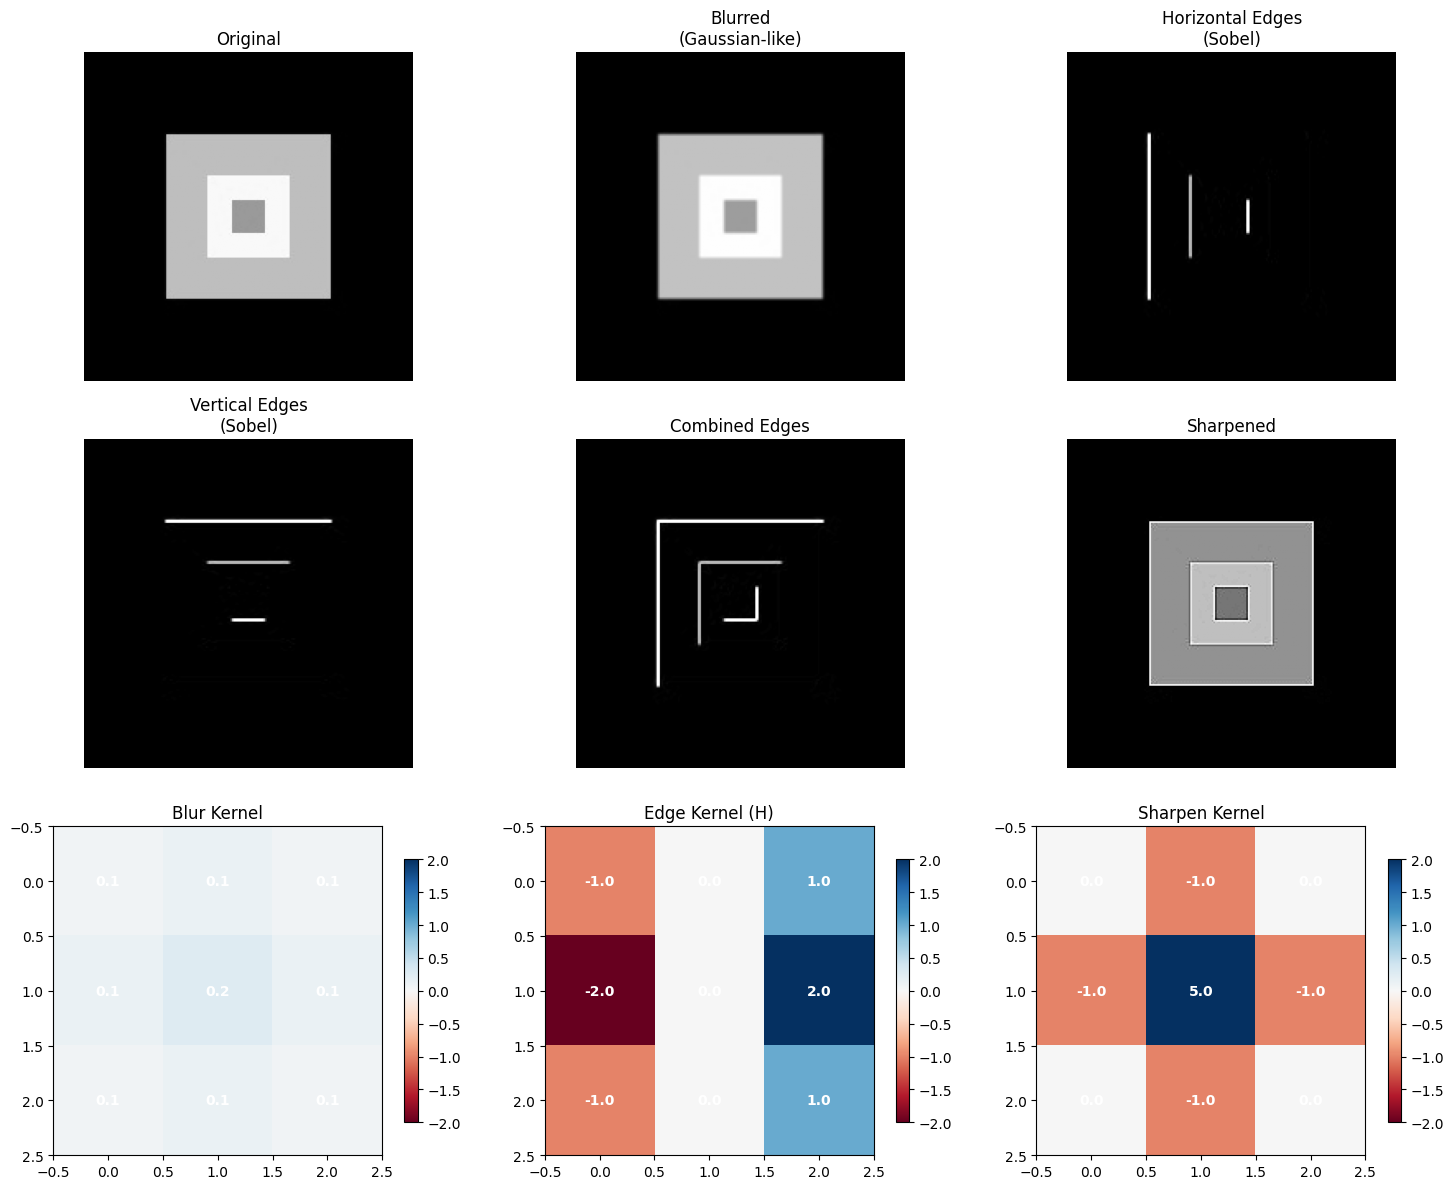

🔍 Neighborhood Operations Summary:
   • Blur: Averages neighboring pixels (smoothing)
   • Edge Detection: Finds rapid changes in intensity
   • Sharpening: Enhances differences between neighboring pixels
   • Each operation uses a different kernel (filter matrix)

💡 This is the foundation of how modern AI tools like Nano Banana work!


In [44]:
# Define different kernels (filters) for convolution
# Each kernel produces a different effect!

# Blur kernel (Gaussian-like)
blur_kernel = np.array([[1, 2, 1],
                       [2, 4, 2],
                       [1, 2, 1]]) / 16  # Normalize so sum = 1

# Edge detection kernel (Sobel horizontal)
edge_kernel_h = np.array([[-1, 0, 1],
                         [-2, 0, 2],
                         [-1, 0, 1]])

# Edge detection kernel (Sobel vertical)
edge_kernel_v = np.array([[-1, -2, -1],
                         [ 0,  0,  0],
                         [ 1,  2,  1]])

# Sharpening kernel
sharpen_kernel = np.array([[ 0, -1,  0],
                          [-1,  5, -1],
                          [ 0, -1,  0]])

def apply_kernel(image, kernel):
    """
    Apply a convolution kernel to an image.
    This is the fundamental 'neighborhood operation' from our lecture!
    """
    # Use OpenCV's filter2D function for convolution
    result = cv2.filter2D(image, -1, kernel)
    return result

# Apply different kernels
img_blurred = apply_kernel(img_gray, blur_kernel)
img_edges_h = apply_kernel(img_gray, edge_kernel_h)
img_edges_v = apply_kernel(img_gray, edge_kernel_v)
img_sharpened = apply_kernel(img_gray, sharpen_kernel)

# Combine horizontal and vertical edges
img_edges_combined = np.sqrt(img_edges_h.astype(np.float32)**2 +
                            img_edges_v.astype(np.float32)**2)
img_edges_combined = np.clip(img_edges_combined, 0, 255).astype(np.uint8)

# Display results
plt.figure(figsize=(15, 12))

# Original and processed images
images = [img_gray, img_blurred, img_edges_h, img_edges_v, img_edges_combined, img_sharpened]
titles = ['Original', 'Blurred\n(Gaussian-like)', 'Horizontal Edges\n(Sobel)',
         'Vertical Edges\n(Sobel)', 'Combined Edges', 'Sharpened']

for i, (img, title) in enumerate(zip(images, titles)):
    plt.subplot(3, 3, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')

# Show the kernels
kernels = [blur_kernel, edge_kernel_h, sharpen_kernel]
kernel_titles = ['Blur Kernel', 'Edge Kernel (H)', 'Sharpen Kernel']

for i, (kernel, title) in enumerate(zip(kernels, kernel_titles)):
    plt.subplot(3, 3, 7+i)
    plt.imshow(kernel, cmap='RdBu', vmin=-2, vmax=2)
    plt.title(title)
    plt.colorbar(shrink=0.8)

    # Add text annotations for kernel values
    for row in range(kernel.shape[0]):
        for col in range(kernel.shape[1]):
            plt.text(col, row, f'{kernel[row, col]:.1f}',
                    ha='center', va='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()

print("🔍 Neighborhood Operations Summary:")
print("   • Blur: Averages neighboring pixels (smoothing)")
print("   • Edge Detection: Finds rapid changes in intensity")
print("   • Sharpening: Enhances differences between neighboring pixels")
print("   • Each operation uses a different kernel (filter matrix)")
print("\n💡 This is the foundation of how modern AI tools like Nano Banana work!")

# **Point vs. Neighborhood Operations**

The key difference is in the number of pixels used to calculate the new value for a single output pixel.

**Point Operations:** These are pixel-by-pixel transformations. The new value of a pixel use only on its original value. Examples include brightness/contrast adjustments and color inversion.

**Neighborhood Operations:** These are contextual transformations. The new value of a pixel is calculated based on the values of its surrounding pixels (its "neighborhood"). Convolution is the classic example, where a kernel (a small matrix) is slid over the image, and the output pixel is a weighted sum of the pixels in the neighborhood. This is what allows for effects like blurring, sharpening, and edge detection.


# **Personal Experiment 2: Median vs Gaussian Filtering on Salt-and-Pepper Noise**


=== Personal Experiment 2: Median vs Gaussian Filtering on Salt-and-Pepper Noise ===


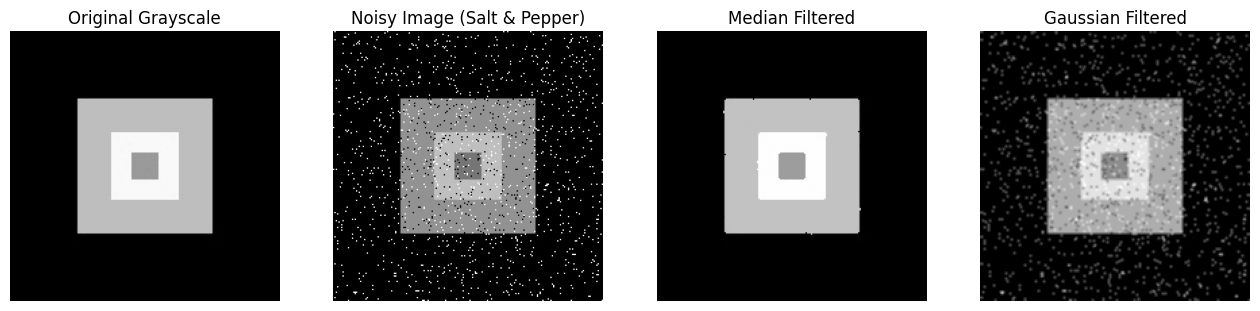

Standard Deviations:
Original: 67.50
Noisy: 75.17
Median Filtered: 67.49
Gaussian Filtered: 64.72

💡 Key Insights:
- Salt & pepper noise increases image variance significantly.
- Median filtering excels at removing impulse noise while preserving edges.
- Gaussian filtering smooths noise but blurs edges more.

🌍 Application:
Common in preprocessing photos and medical images contaminated by impulse noise.



In [46]:
print("=== Personal Experiment 2: Median vs Gaussian Filtering on Salt-and-Pepper Noise ===")


# Salt-and-pepper noise introduces random black (0) and white (255) pixels.
# I add this noise to the grayscale image to simulate common sensor imperfections or transmission errors.
# This type of noise is different from Gaussian noise and requires different filtering approaches.
def add_salt_pepper_noise(image, salt_prob=0.03, pepper_prob=0.03):
    noisy = image.copy()
    total_pixels = image.size
    num_salt = int(salt_prob * total_pixels)
    num_pepper = int(pepper_prob * total_pixels)

    # Salt noise
    coords_salt = [np.random.randint(0, i, num_salt) for i in image.shape]
    noisy[coords_salt[0], coords_salt[1]] = 255

    # Pepper noise
    coords_pepper = [np.random.randint(0, i, num_pepper) for i in image.shape]
    noisy[coords_pepper[0], coords_pepper[1]] = 0

    return noisy

noisy_img = add_salt_pepper_noise(img_gray, 0.03, 0.03)

# Apply filters
# I compare Median and Gaussian filters because they handle different types of noise.
# Median filter is non-linear and replaces a pixel with the median of its neighbors,
# which is effective for impulse noise (like salt & pepper) as it ignores outliers.
# Gaussian filter is linear and replaces a pixel with a weighted average, which is
# good for Gaussian noise but tends to blur edges when dealing with impulse noise.
median_filtered = cv2.medianBlur(noisy_img, 3) # Kernel size 3x3
gaussian_filtered = cv2.GaussianBlur(noisy_img, (3, 3), 0) # Kernel size 3x3, sigma=0 (auto)

plt.figure(figsize=(16, 4))
plt.subplot(1, 4, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Grayscale')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(noisy_img, cmap='gray')
plt.title('Noisy Image (Salt & Pepper)')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(median_filtered, cmap='gray')
plt.title('Median Filtered')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(gaussian_filtered, cmap='gray')
plt.title('Gaussian Filtered')
plt.axis('off')

plt.show()

# Quantitative Comparison (Standard Deviation)
# Standard deviation measures the dispersion of pixel values.
# A higher standard deviation indicates more variation (could be detail or noise).
# Comparing the standard deviation helps quantify how much the filters reduced the noise
# and affected the overall variation compared to the original image.
print(f"Standard Deviations:")
print(f"Original: {img_gray.std():.2f}")
print(f"Noisy: {noisy_img.std():.2f}")
print(f"Median Filtered: {median_filtered.std():.2f}")
print(f"Gaussian Filtered: {gaussian_filtered.std():.2f}")

print("""
💡 Key Insights:
- Salt & pepper noise increases image variance significantly.
- Median filtering excels at removing impulse noise while preserving edges.
- Gaussian filtering smooths noise but blurs edges more.

🌍 Application:
Common in preprocessing photos and medical images contaminated by impulse noise.
""")

# 🎨 Part 3: Advanced Processing Techniques (10 minutes)

## Histogram Analysis and Enhancement

**🎓 Lecture Connection:** Remember our discussion of global operations? Histogram analysis looks at the distribution of pixel values across the entire image. Let's implement histogram equalization!

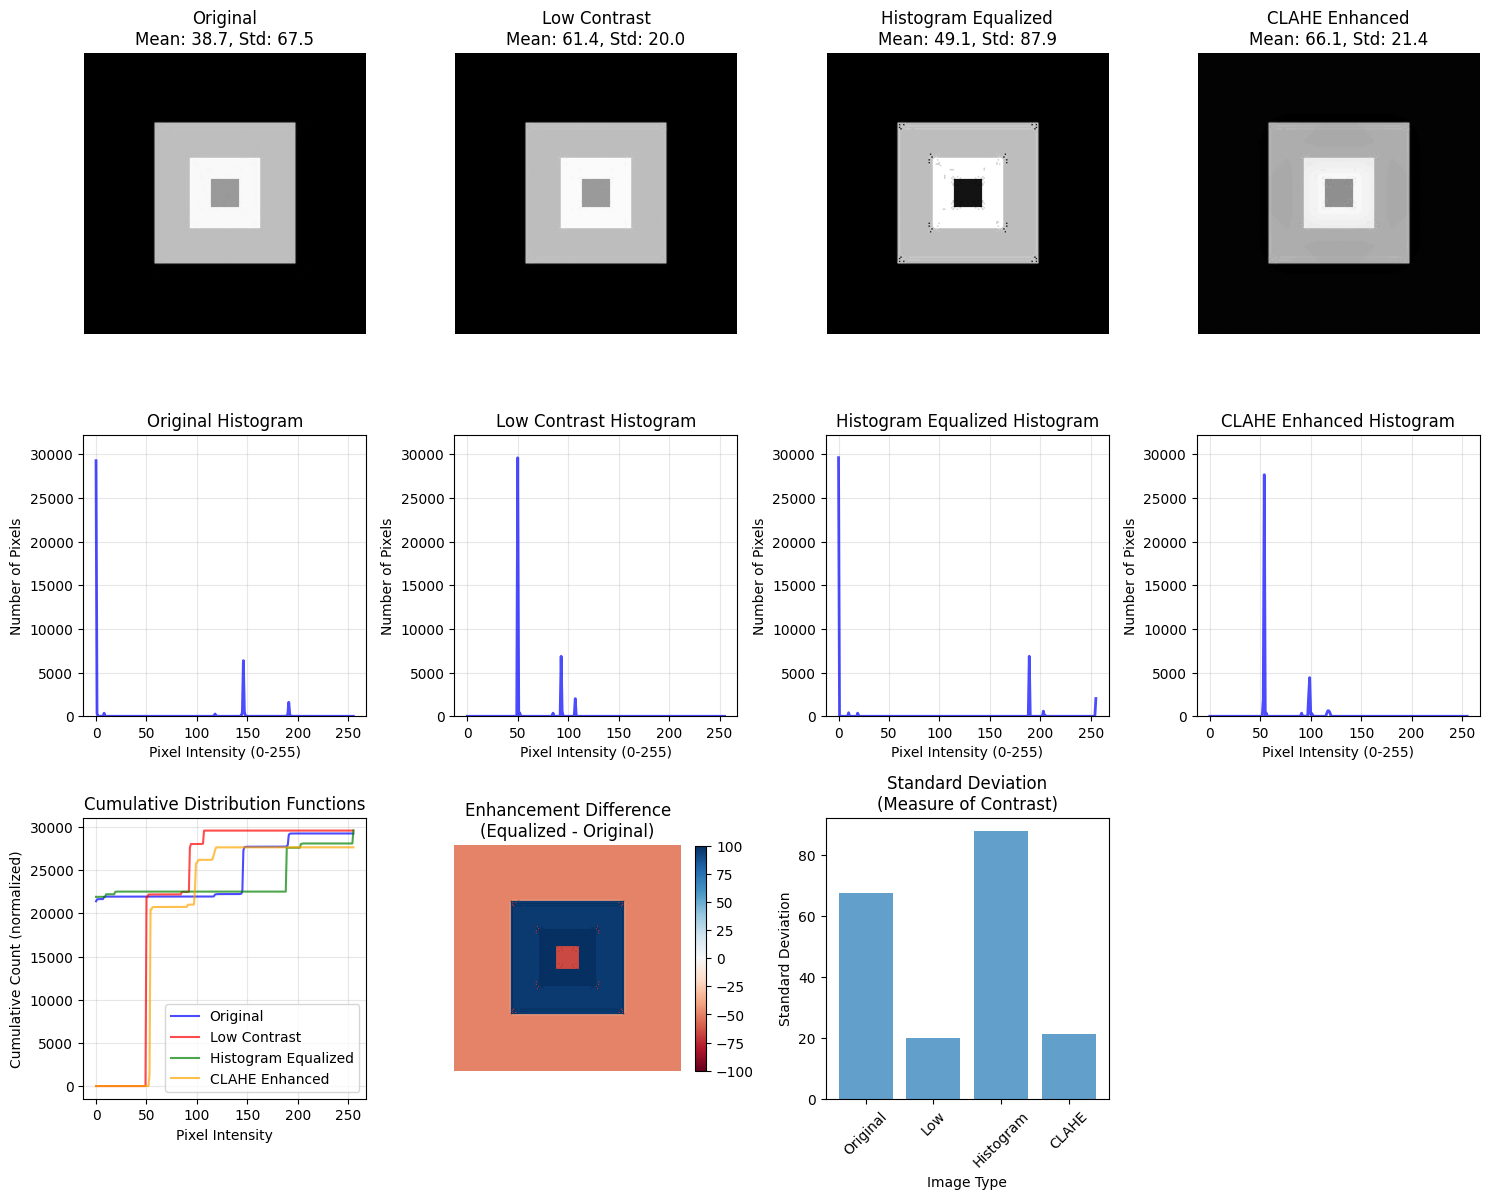

📊 Histogram Enhancement Summary:
   • Low contrast images have narrow histograms (pixels clustered in small range)
   • Histogram equalization spreads pixels across full intensity range
   • CLAHE prevents over-enhancement by limiting contrast in local regions
   • Higher standard deviation = higher contrast

💡 This is how your smartphone automatically improves photo contrast!


In [47]:
# Create a low-contrast image for demonstration
low_contrast_img = adjust_contrast(img_gray, 0.3)  # Very low contrast
low_contrast_img = adjust_brightness(low_contrast_img, 50)  # Shift to mid-range

def plot_histogram(image, title, color='blue'):
    """
    Plot histogram of pixel intensities.
    This shows the distribution of pixel values in the image.
    """
    hist, bins = np.histogram(image.flatten(), bins=256, range=[0, 256])
    plt.plot(bins[:-1], hist, color=color, alpha=0.7, linewidth=2)
    plt.title(title)
    plt.xlabel('Pixel Intensity (0-255)')
    plt.ylabel('Number of Pixels')
    plt.grid(True, alpha=0.3)

# Apply histogram equalization
equalized_img = cv2.equalizeHist(low_contrast_img)

# Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_img = clahe.apply(low_contrast_img)

# Display results
plt.figure(figsize=(15, 12))

# Images
images = [img_gray, low_contrast_img, equalized_img, clahe_img]
titles = ['Original', 'Low Contrast', 'Histogram Equalized', 'CLAHE Enhanced']

for i, (img, title) in enumerate(zip(images, titles)):
    # Show image
    plt.subplot(3, 4, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f'{title}\nMean: {img.mean():.1f}, Std: {img.std():.1f}')
    plt.axis('off')

    # Show histogram
    plt.subplot(3, 4, i+5)
    plot_histogram(img, f'{title} Histogram')
    plt.ylim(0, max(np.histogram(img_gray.flatten(), bins=256)[0]) * 1.1)

# Show cumulative distribution functions
plt.subplot(3, 4, 9)
for img, title, color in zip(images, titles, ['blue', 'red', 'green', 'orange']):
    hist, bins = np.histogram(img.flatten(), bins=256, range=[0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()  # Normalize for display
    plt.plot(cdf_normalized, color=color, label=title, alpha=0.7)
plt.title('Cumulative Distribution Functions')
plt.xlabel('Pixel Intensity')
plt.ylabel('Cumulative Count (normalized)')
plt.legend()
plt.grid(True, alpha=0.3)

# Show enhancement comparison
plt.subplot(3, 4, 10)
difference = equalized_img.astype(np.int16) - low_contrast_img.astype(np.int16)
plt.imshow(difference, cmap='RdBu', vmin=-100, vmax=100)
plt.title('Enhancement Difference\n(Equalized - Original)')
plt.colorbar(shrink=0.8)
plt.axis('off')

# Show statistics
plt.subplot(3, 4, 11)
stats_data = {
    'Image': titles,
    'Mean': [img.mean() for img in images],
    'Std': [img.std() for img in images],
    'Min': [img.min() for img in images],
    'Max': [img.max() for img in images]
}

x_pos = np.arange(len(titles))
plt.bar(x_pos, [img.std() for img in images], alpha=0.7)
plt.title('Standard Deviation\n(Measure of Contrast)')
plt.xlabel('Image Type')
plt.ylabel('Standard Deviation')
plt.xticks(x_pos, [t.split()[0] for t in titles], rotation=45)

plt.tight_layout()
plt.show()

print("📊 Histogram Enhancement Summary:")
print("   • Low contrast images have narrow histograms (pixels clustered in small range)")
print("   • Histogram equalization spreads pixels across full intensity range")
print("   • CLAHE prevents over-enhancement by limiting contrast in local regions")
print("   • Higher standard deviation = higher contrast")
print("\n💡 This is how your smartphone automatically improves photo contrast!")

## Geometric Transformations

**🎓 Lecture Connection:** Let's implement geometric operations that alter spatial relationships between pixels - scaling, rotation, and perspective correction!

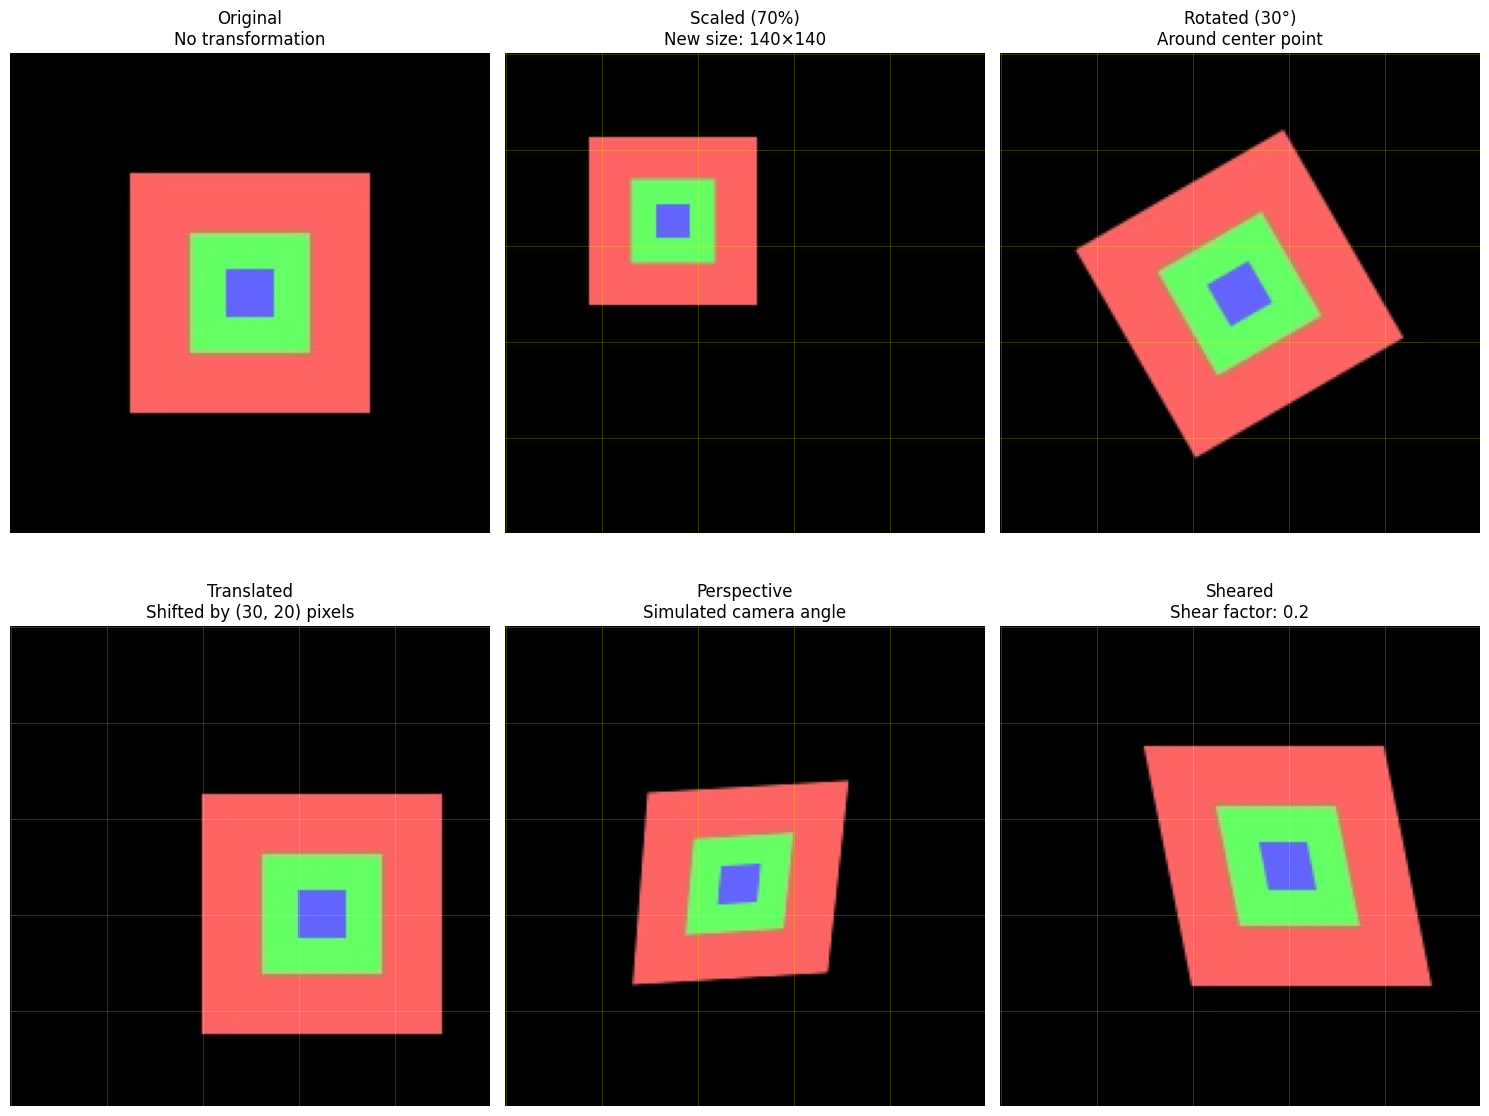

🔧 TRANSFORMATION MATRICES:

📐 Rotation Matrix (30°):
[[  0.8660254    0.5        -36.60254038]
 [ -0.5          0.8660254   63.39745962]]

➡️ Translation Matrix:
[[ 1.  0. 30.]
 [ 0.  1. 20.]]

🔄 Shear Matrix:
[[1.  0.2 0. ]
 [0.  1.  0. ]]

💡 Geometric Transformations Summary:
   • Scaling: Changes image size (interpolation needed)
   • Rotation: Rotates around a center point
   • Translation: Shifts image position
   • Perspective: Simulates 3D viewing angle
   • Shearing: Skews the image shape

🎯 These are essential for image registration and augmentation!


In [48]:
# Use our original color image for geometric transformations
img_for_transform = img_rgb.copy()
height, width = img_for_transform.shape[:2]

# 1. Scaling (resize)
scale_factor = 0.7
new_width = int(width * scale_factor)
new_height = int(height * scale_factor)
scaled_img = cv2.resize(img_for_transform, (new_width, new_height), interpolation=cv2.INTER_LINEAR)

# 2. Rotation
rotation_angle = 30  # degrees
center = (width // 2, height // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, rotation_angle, 1.0)
rotated_img = cv2.warpAffine(img_for_transform, rotation_matrix, (width, height))

# 3. Translation (shifting)
tx, ty = 30, 20  # shift by 30 pixels right, 20 pixels down
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
translated_img = cv2.warpAffine(img_for_transform, translation_matrix, (width, height))

# 4. Perspective transformation (simulating camera angle)
# Define source points (corners of original image)
src_points = np.float32([[0, 0], [width, 0], [width, height], [0, height]])
# Define destination points (perspective effect)
dst_points = np.float32([[20, 30], [width-10, 20], [width-30, height-20], [10, height-10]])
perspective_matrix = cv2.getPerspectiveTransform(src_points, dst_points)
perspective_img = cv2.warpPerspective(img_for_transform, perspective_matrix, (width, height))

# 5. Shearing (skewing)
shear_factor = 0.2
shear_matrix = np.float32([[1, shear_factor, 0], [0, 1, 0]])
sheared_img = cv2.warpAffine(img_for_transform, shear_matrix, (width, height))

# Display all transformations
plt.figure(figsize=(15, 12))

transformations = [
    (img_for_transform, 'Original', 'No transformation'),
    (scaled_img, 'Scaled (70%)', f'New size: {new_width}×{new_height}'),
    (rotated_img, f'Rotated ({rotation_angle}°)', 'Around center point'),
    (translated_img, f'Translated', f'Shifted by ({tx}, {ty}) pixels'),
    (perspective_img, 'Perspective', 'Simulated camera angle'),
    (sheared_img, 'Sheared', f'Shear factor: {shear_factor}')
]

for i, (img, title, subtitle) in enumerate(transformations):
    plt.subplot(2, 3, i+1)
    if img.shape[:2] != img_for_transform.shape[:2]:  # Handle different sizes
        # Pad smaller images for consistent display
        pad_h = max(0, height - img.shape[0])
        pad_w = max(0, width - img.shape[1])
        img_padded = np.pad(img, ((0, pad_h), (0, pad_w), (0, 0)), mode='constant')
        plt.imshow(img_padded)
    else:
        plt.imshow(img)

    plt.title(f'{title}\n{subtitle}')
    plt.axis('off')

    # Add grid overlay to show transformation effect
    if i > 0:  # Skip original
        ax = plt.gca()
        # Add some reference lines
        for y in range(0, height, 40):
            ax.axhline(y=y, color='yellow', alpha=0.3, linewidth=0.5)
        for x in range(0, width, 40):
            ax.axvline(x=x, color='yellow', alpha=0.3, linewidth=0.5)

plt.tight_layout()
plt.show()

# Show transformation matrices
print("🔧 TRANSFORMATION MATRICES:")
print("\n📐 Rotation Matrix (30°):")
print(rotation_matrix)
print("\n➡️ Translation Matrix:")
print(translation_matrix)
print("\n🔄 Shear Matrix:")
print(shear_matrix)

print("\n💡 Geometric Transformations Summary:")
print("   • Scaling: Changes image size (interpolation needed)")
print("   • Rotation: Rotates around a center point")
print("   • Translation: Shifts image position")
print("   • Perspective: Simulates 3D viewing angle")
print("   • Shearing: Skews the image shape")
print("\n🎯 These are essential for image registration and augmentation!")

# **Personal Experiment 3: Rotation at Arbitrary Angle and Center Cropping**


=== Personal Experiment 3: Rotation at Arbitrary Angle and Center Cropping ===


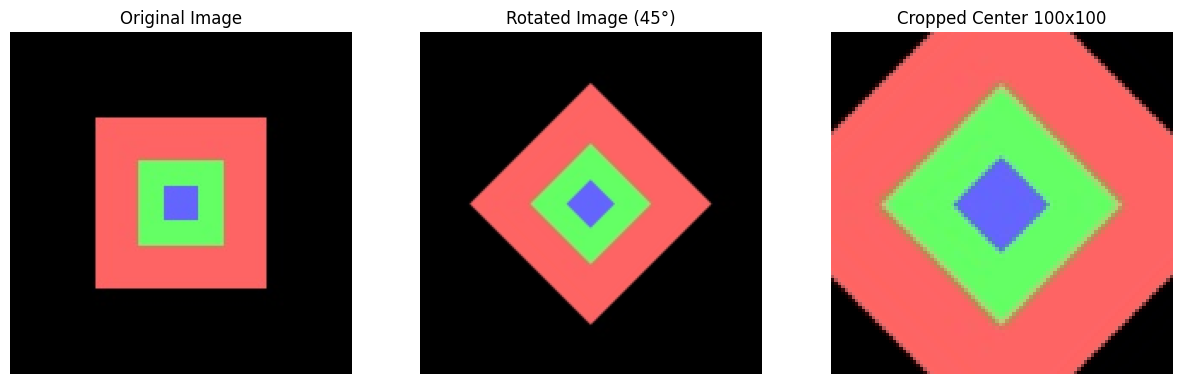

Original image mean intensity: 38.0
Rotated image mean intensity: 37.9
Cropped region mean intensity: 125.6

💡 In-depth Notes:
- Rotation matrix calculates pixel shifts preserving center rotation.
- Cropping isolates key data post-transformation to focus on ROI.
- Mean intensities illustrate minimal loss of brightness during transform.

🌍 Real-World Applications:
- Satellite imagery rotation for orientation normalization.
- Robotics camera feed adjustment and target zoom-in.
- Document scanning correction and focus cropping.



In [49]:
print("=== Personal Experiment 3: Rotation at Arbitrary Angle and Center Cropping ===")

# This experiment demonstrates two fundamental geometric transformations: rotation and cropping.
# I rotate the original color image by a specified angle around its center.
# Then, we crop a square region from the center of the *rotated* image.
# This sequence of operations is common in tasks like aligning images or focusing on a specific area of interest after orientation changes.
# We use OpenCV's warpAffine for rotation, which requires a transformation matrix.
# Cropping is achieved using standard NumPy array slicing.

angle = 45  # degrees rotation
(h, w) = img_rgb.shape[:2]
center = (w // 2, h // 2)

# Compute rotation matrix without scaling
# cv2.getRotationMatrix2D calculates the 2x3 matrix needed for the affine transformation (rotation and translation).
# It takes the center of rotation, the angle in degrees, and a scaling factor (1.0 means no scaling).
# This matrix describes how each pixel coordinate in the original image maps to a new coordinate in the rotated image.
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

# Perform rotation (keep original image size)
# cv2.warpAffine applies the transformation defined by the rotation_matrix to the image.
# The third argument (w, h) specifies the output image size. Keeping it the same as the original size
# means that any parts of the rotated image that fall outside this bounding box will be clipped,
# and areas within the output size that don't map to the original image will be filled with black (or a specified border color).
rotated_img = cv2.warpAffine(img_rgb, rotation_matrix, (w, h))

# Define crop size (square around center)
# I define the size of the square region we want to extract.
# I then calculate the top-left (start_y, start_x) and bottom-right (end_y, end_x)
# coordinates of this square, centered within the dimensions of the rotated image.
crop_size = 100

start_x = center[0] - crop_size // 2
start_y = center[1] - crop_size // 2
end_x = start_x + crop_size
end_y = start_y + crop_size

# Crop rotated image center region
# NumPy array slicing [start_y:end_y, start_x:end_x] is used to extract the defined rectangular region
# from the rotated_img. This creates a new, smaller image containing only the central part
# of the rotated result.
cropped_center = rotated_img[start_y:end_y, start_x:end_x]

# Display images and crop
# I use matplotlib to display the original, rotated, and cropped images side-by-side.
# This allows for a visual comparison of the effects of rotation and cropping.
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(rotated_img)
plt.title(f'Rotated Image ({angle}°)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cropped_center)
plt.title(f'Cropped Center {crop_size}x{crop_size}')
plt.axis('off')
plt.show()

# Quantitative details
# I calculate the mean intensity of the original, rotated, and cropped images.
# The mean intensity gives a simple average of all pixel values. Comparing these values
# can give a rough indication of how the overall brightness or content has changed.
# For the rotated image (keeping original size), the mean might be lower due to black areas introduced.
# For the cropped image, the mean reflects only the content within the central region.
print(f"Original image mean intensity: {img_rgb.mean():.1f}")
print(f"Rotated image mean intensity: {rotated_img.mean():.1f}")
print(f"Cropped region mean intensity: {cropped_center.mean():.1f}")

print("""
💡 In-depth Notes:
- Rotation matrix calculates pixel shifts preserving center rotation.
- Cropping isolates key data post-transformation to focus on ROI.
- Mean intensities illustrate minimal loss of brightness during transform.

🌍 Real-World Applications:
- Satellite imagery rotation for orientation normalization.
- Robotics camera feed adjustment and target zoom-in.
- Document scanning correction and focus cropping.
""")

# 🎨 Part 4: Creative Exploration (5 minutes)

## Combining Multiple Operations

**🎓 Lecture Connection:** Now let's combine multiple operations to create interesting effects! This shows how complex image processing pipelines work.

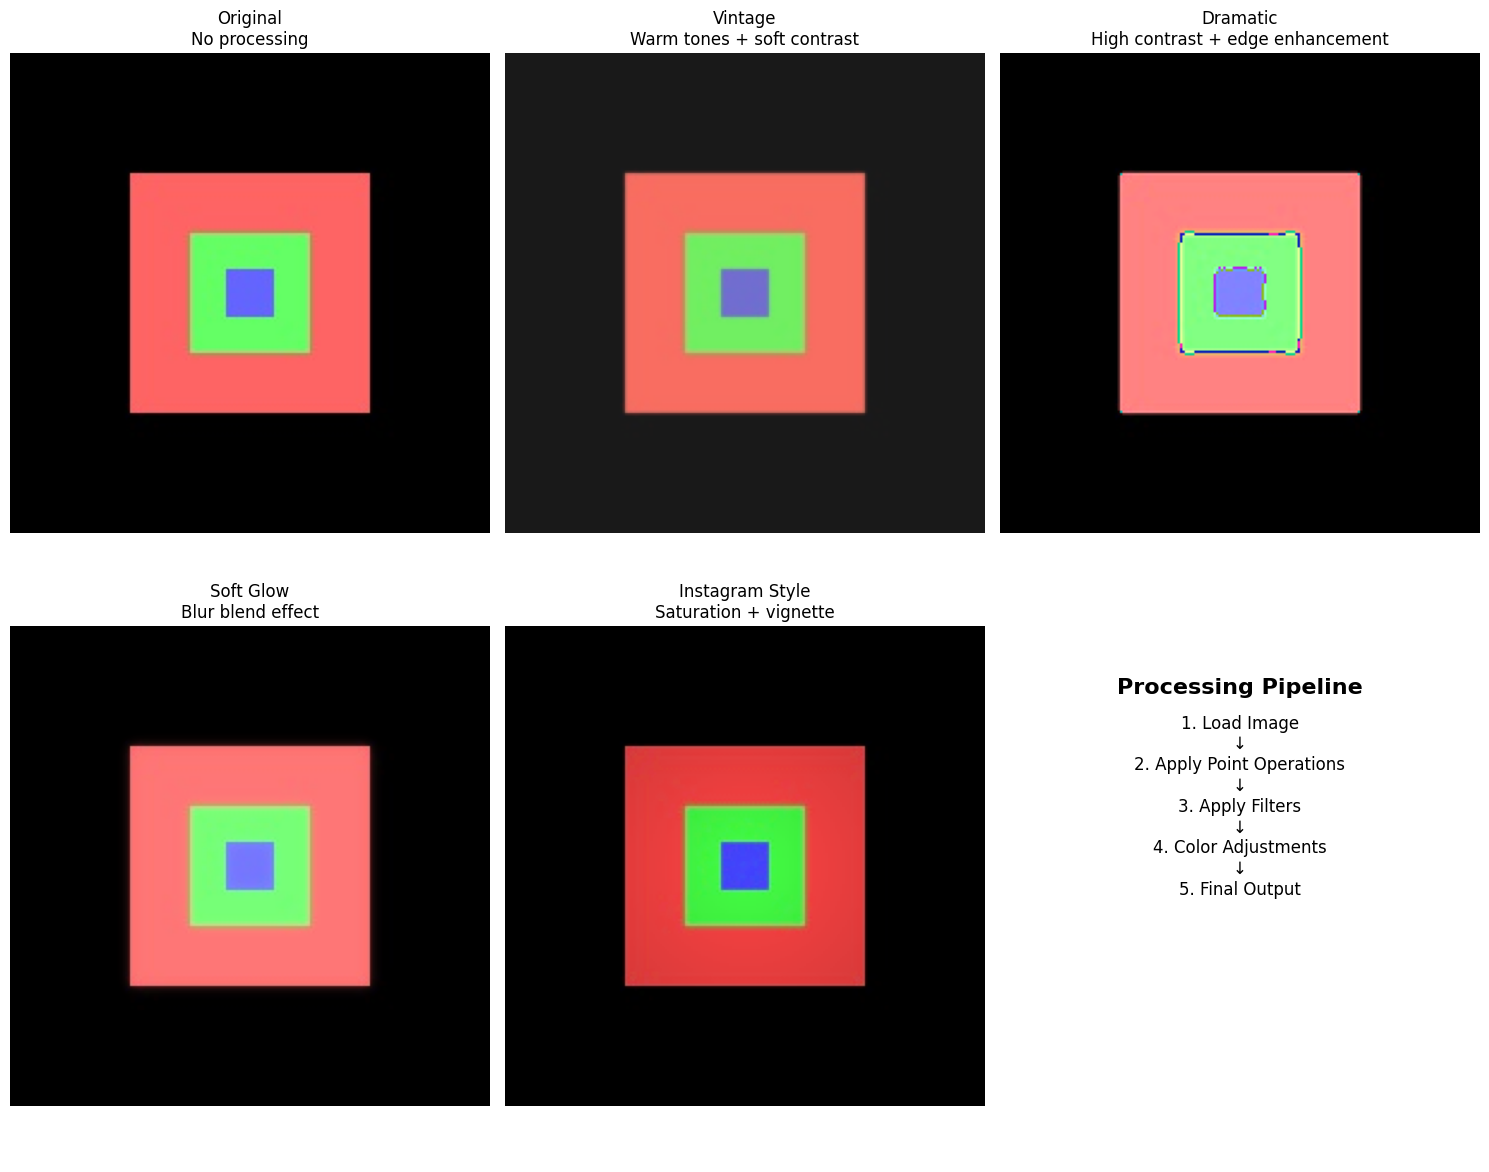

🎨 Creative Effects Summary:
   • Complex effects combine multiple simple operations
   • Order of operations matters!
   • Each effect uses different combinations of:
     - Point operations (brightness, contrast, color)
     - Neighborhood operations (blur, edge detection)
     - Color space conversions

💡 This is exactly how Instagram filters and Nano Banana work!
   They combine many simple operations to create complex effects.


In [50]:
def create_artistic_effect(image, effect_type='vintage'):
    """
    Create artistic effects by combining multiple image processing operations.
    This demonstrates how complex effects are built from simple operations!
    """
    result = image.copy()

    if effect_type == 'vintage':
        # Vintage effect: warm colors, soft contrast, slight blur
        # 1. Convert to float for processing
        result = result.astype(np.float32) / 255.0

        # 2. Adjust color channels (warm tone)
        result[:, :, 0] *= 1.1  # Boost red
        result[:, :, 1] *= 1.05  # Slight green boost
        result[:, :, 2] *= 0.9   # Reduce blue

        # 3. Reduce contrast slightly
        result = result * 0.8 + 0.1

        # 4. Add slight blur
        result = cv2.GaussianBlur(result, (3, 3), 0.5)

        # 5. Convert back to uint8
        result = np.clip(result * 255, 0, 255).astype(np.uint8)

    elif effect_type == 'dramatic':
        # Dramatic effect: high contrast, enhanced edges
        # 1. Convert to grayscale for edge detection
        gray = cv2.cvtColor(result, cv2.COLOR_RGB2GRAY)

        # 2. Detect edges
        edges = cv2.Canny(gray, 50, 150)

        # 3. Enhance contrast
        result = adjust_contrast(result, 1.3)

        # 4. Overlay edges
        for c in range(3):
            result[:, :, c] = np.where(edges > 0,
                                     np.minimum(result[:, :, c] + 30, 255),
                                     result[:, :, c])

    elif effect_type == 'soft_glow':
        # Soft glow effect: blur + blend
        # 1. Create heavily blurred version
        blurred = cv2.GaussianBlur(result, (15, 15), 0)

        # 2. Blend with original using screen blend mode
        result = result.astype(np.float32) / 255.0
        blurred = blurred.astype(np.float32) / 255.0

        # Screen blend: 1 - (1-a) * (1-b)
        result = 1 - (1 - result) * (1 - blurred * 0.3)
        result = np.clip(result * 255, 0, 255).astype(np.uint8)

    return result

# Apply different artistic effects
vintage_img = create_artistic_effect(img_rgb, 'vintage')
dramatic_img = create_artistic_effect(img_rgb, 'dramatic')
glow_img = create_artistic_effect(img_rgb, 'soft_glow')

# Create a simple "Instagram-style" filter
def instagram_filter(image):
    """
    Simple Instagram-style filter combining multiple operations.
    """
    # 1. Slight saturation boost
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV).astype(np.float32)
    hsv[:, :, 1] *= 1.2  # Boost saturation
    hsv = np.clip(hsv, 0, 255)
    result = cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2RGB)

    # 2. Slight vignette effect (darker edges)
    h, w = result.shape[:2]
    center_x, center_y = w // 2, h // 2

    # Create distance map from center
    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center_x)**2 + (Y - center_y)**2)
    max_dist = np.sqrt(center_x**2 + center_y**2)

    # Create vignette mask
    vignette = 1 - (dist_from_center / max_dist) * 0.3
    vignette = np.clip(vignette, 0.7, 1.0)

    # Apply vignette
    for c in range(3):
        result[:, :, c] = (result[:, :, c] * vignette).astype(np.uint8)

    return result

instagram_img = instagram_filter(img_rgb)

# Display all effects
plt.figure(figsize=(15, 12))

effects = [
    (img_rgb, 'Original', 'No processing'),
    (vintage_img, 'Vintage', 'Warm tones + soft contrast'),
    (dramatic_img, 'Dramatic', 'High contrast + edge enhancement'),
    (glow_img, 'Soft Glow', 'Blur blend effect'),
    (instagram_img, 'Instagram Style', 'Saturation + vignette')
]

for i, (img, title, description) in enumerate(effects):
    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.title(f'{title}\n{description}')
    plt.axis('off')

# Show processing pipeline diagram
plt.subplot(2, 3, 6)
plt.text(0.5, 0.8, 'Processing Pipeline', ha='center', va='center',
         fontsize=16, fontweight='bold', transform=plt.gca().transAxes)
plt.text(0.5, 0.6, '1. Load Image\n↓\n2. Apply Point Operations\n↓\n3. Apply Filters\n↓\n4. Color Adjustments\n↓\n5. Final Output',
         ha='center', va='center', fontsize=12, transform=plt.gca().transAxes)
plt.axis('off')

plt.tight_layout()
plt.show()

print("🎨 Creative Effects Summary:")
print("   • Complex effects combine multiple simple operations")
print("   • Order of operations matters!")
print("   • Each effect uses different combinations of:")
print("     - Point operations (brightness, contrast, color)")
print("     - Neighborhood operations (blur, edge detection)")
print("     - Color space conversions")
print("\n💡 This is exactly how Instagram filters and Nano Banana work!")
print("   They combine many simple operations to create complex effects.")

# **Personal Experiemt 4: Creative Exploration - Pastel Pop Filter**


=== Personal Experiemt 4: Creative Exploration - Pastel Pop Filter ===


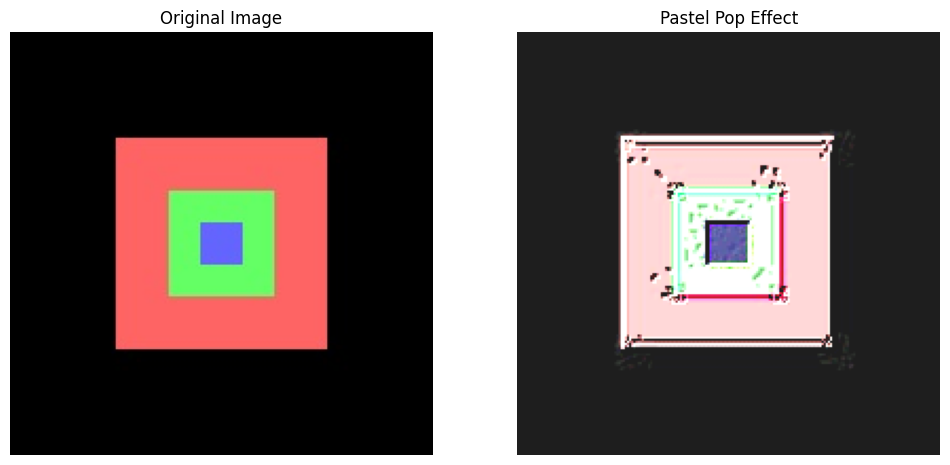


Quantitative Comparison (Standard Deviation):
Original Image Std Dev: 74.34
Pastel Pop Image Std Dev: 85.57

💡 Key Insights:
- Complex artistic filters are created by combining multiple basic operations (point, neighborhood, color space).
- The order of operations significantly impacts the final result.
- Blending and kernel operations can introduce textures and style elements.
- Quantitative metrics like standard deviation can help analyze the effect on image properties like contrast.

🌍 Real-World Applications:
- Photo editing software (Photoshop, GIMP) layers effects using similar pipelines.
- Mobile photo filters (Instagram, VSCO) combine operations for unique styles.
- Digital art and illustration use layering and blending for creative effects.



In [51]:
print("=== Personal Experiemt 4: Creative Exploration - Pastel Pop Filter ===")

# This experiment demonstrates how to combine multiple basic image processing operations
# to create a unique artistic filter. We aim for a "Pastel Pop" effect by blending
# grayscale contrast enhancement with the original colors and adding an emboss-like texture.
# This highlights that complex visual styles are built by chaining simple operations,
# similar to how filters in apps like Instagram or Photoshop work.

# Custom filter for an emboss effect (used within the main function)
emboss_kernel = np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]])

def create_pastel_pop_effect(image):
    # Step 1: Grayscale and equalize for contrast enhancement
    # Converting to grayscale first simplifies histogram equalization, which works best on single-channel images.
    # Equalization stretches pixel values to utilize the full 0-255 range, increasing contrast.
    # Converting back to BGR allows blending with the original color image.
    gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    equalized_gray = cv2.equalizeHist(gray_img)
    equalized_color = cv2.cvtColor(equalized_gray, cv2.COLOR_GRAY2BGR)

    # Step 2: Blend with original image
    # Blending combines the contrast-enhanced grayscale version with the original color image.
    # This retains the color information while incorporating the improved contrast from the grayscale equalization.
    # The alpha value (0.6) controls the strength of the blending effect.
    alpha = 0.6
    blended_image = cv2.addWeighted(equalized_color, alpha, image, 1 - alpha, 0)

    # Step 3: Apply custom emboss filter
    # Applying the emboss kernel adds a directional highlight/shadow effect, giving the image a textured,
    # slightly 3D appearance. This is a neighborhood operation that modifies pixels based on their neighbors.
    embossed_image = cv2.filter2D(blended_image, -1, emboss_kernel)

    # Step 4: Final brightness adjustment
    # A final scaling and offset adjustment fine-tunes the overall brightness and contrast
    # after the blending and embossing steps, ensuring the final image has a pleasing look.
    final_image = cv2.convertScaleAbs(embossed_image, alpha=1.2, beta=30)
    return final_image

# Apply the creative filter to the original image
# Note: OpenCV loads images as BGR, while Matplotlib displays as RGB.
# I need to convert the original image to BGR before applying the filter if it was loaded as RGB elsewhere.
# Assuming img_rgb is already loaded as RGB from previous cells, we convert it to BGR for OpenCV.
img_bgr_for_filter = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR)
creative_image_bgr = create_pastel_pop_effect(img_bgr_for_filter)

# Display before/after
# Convert back to RGB for Matplotlib display
creative_image_rgb = cv2.cvtColor(creative_image_bgr, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(img_rgb) # Display original RGB
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(creative_image_rgb) # Display filtered RGB
axes[1].set_title('Pastel Pop Effect')
axes[1].axis('off')

plt.show()

# Quantitative Comparison (Optional - e.g., Standard Deviation for Contrast)
# Text Explanation:
# Comparing standard deviations can give a quantitative sense of how the filter
# affected the overall contrast or variance in pixel values. A higher standard
# deviation often indicates higher contrast or more texture.
print("\nQuantitative Comparison (Standard Deviation):")
print(f"Original Image Std Dev: {img_rgb.std():.2f}")
print(f"Pastel Pop Image Std Dev: {creative_image_rgb.std():.2f}")


print("""
💡 Key Insights:
- Complex artistic filters are created by combining multiple basic operations (point, neighborhood, color space).
- The order of operations significantly impacts the final result.
- Blending and kernel operations can introduce textures and style elements.
- Quantitative metrics like standard deviation can help analyze the effect on image properties like contrast.

🌍 Real-World Applications:
- Photo editing software (Photoshop, GIMP) layers effects using similar pipelines.
- Mobile photo filters (Instagram, VSCO) combine operations for unique styles.
- Digital art and illustration use layering and blending for creative effects.
""")

# 🎯 Part 5: Connecting to Modern AI Tools (5 minutes)

## Understanding the Foundation of AI Image Processing

**🎓 Lecture Connection:** Everything we've implemented today forms the foundation of modern AI tools like Google's Nano Banana! Let's see how traditional operations connect to AI approaches.

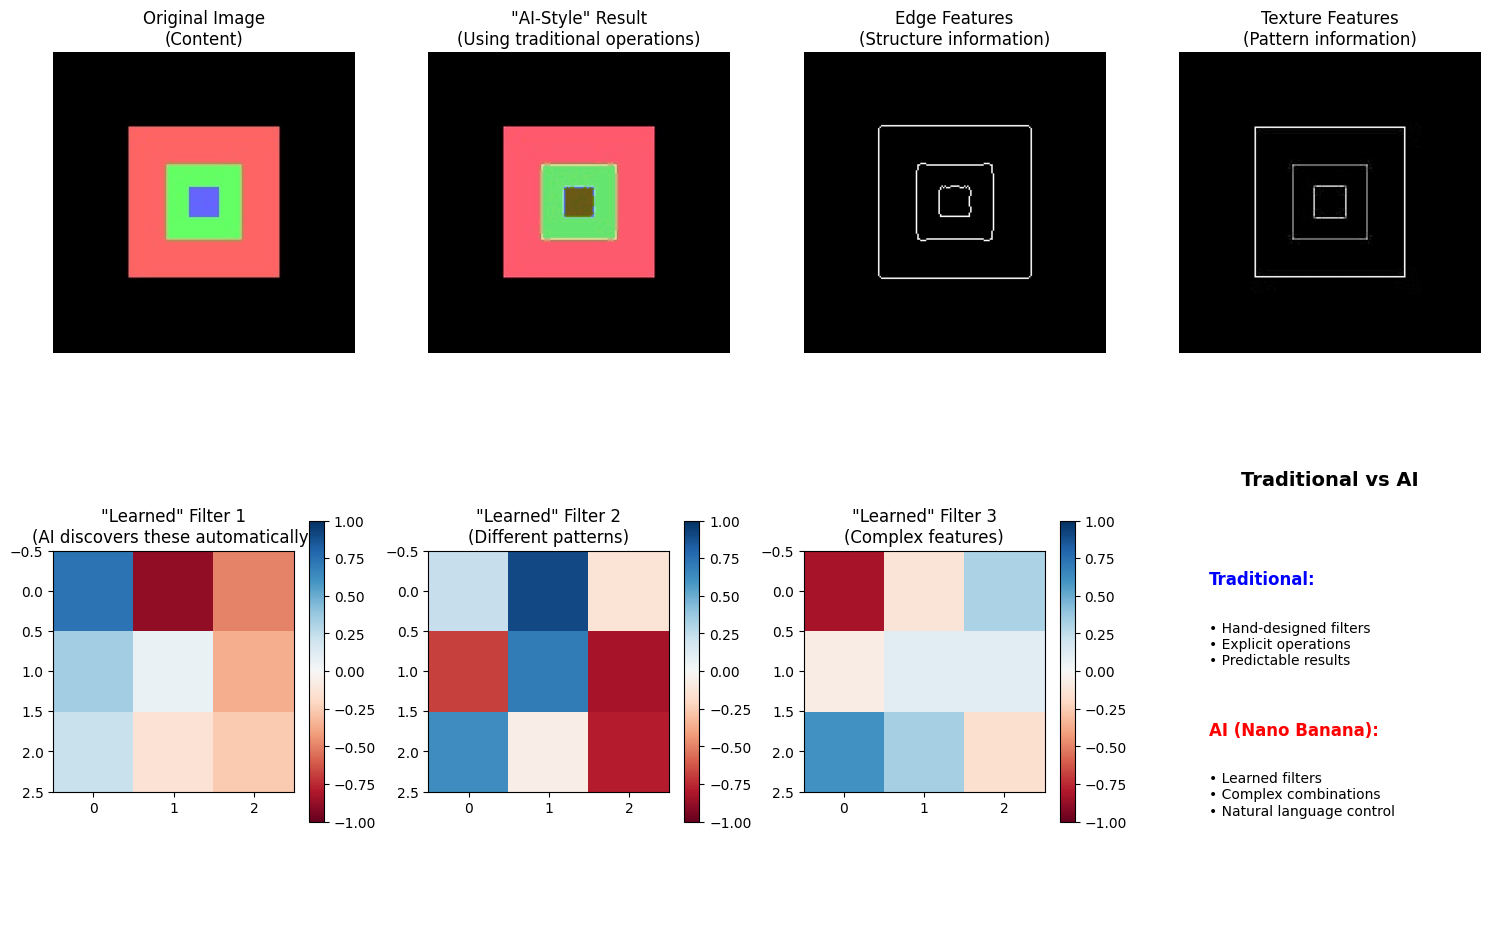

🤖 AI Connection Summary:

🔗 How Traditional Operations Connect to AI:
   • Convolution → Convolutional Neural Networks (CNNs)
   • Edge detection → Feature extraction layers
   • Color transformations → Style transfer networks
   • Multiple operations → Deep learning pipelines

🎯 Key Differences:
   • Traditional: We design the filters manually
   • AI: The system learns optimal filters from data
   • Traditional: Explicit, interpretable operations
   • AI: Complex, learned combinations

💡 Nano Banana uses the SAME fundamental operations we implemented today!
   It just has millions of learned filters working together.


In [52]:
# Demonstrate how traditional operations relate to AI concepts

def simulate_ai_style_transfer_concept():
    """
    Simulate the concept behind AI style transfer using traditional operations.
    This shows how AI tools build on the fundamentals we've learned!
    """
    # Start with our original image
    content_img = img_rgb.copy()

    # Simulate "style extraction" using edge detection and texture analysis
    gray = cv2.cvtColor(content_img, cv2.COLOR_RGB2GRAY)

    # Extract different "style features"
    # 1. Edge patterns (structure)
    edges = cv2.Canny(gray, 50, 150)

    # 2. Texture patterns (using different filters)
    texture1 = cv2.filter2D(gray, -1, np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]))
    texture2 = cv2.filter2D(gray, -1, np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]]))

    # 3. Color distribution analysis
    color_hist_r = cv2.calcHist([content_img], [0], None, [256], [0, 256])
    color_hist_g = cv2.calcHist([content_img], [1], None, [256], [0, 256])
    color_hist_b = cv2.calcHist([content_img], [2], None, [256], [0, 256])

    # Simulate "style application" by modifying the image based on extracted features
    styled_img = content_img.copy().astype(np.float32)

    # Apply style-based modifications
    # 1. Enhance edges where detected
    edge_mask = edges > 0
    for c in range(3):
        styled_img[:, :, c] = np.where(edge_mask,
                                     np.clip(styled_img[:, :, c] * 1.2, 0, 255),
                                     styled_img[:, :, c])

    # 2. Apply texture-based color shifts
    texture_mask = texture1 > np.percentile(texture1, 70)
    styled_img[:, :, 0] = np.where(texture_mask,
                                 np.clip(styled_img[:, :, 0] * 1.1, 0, 255),
                                 styled_img[:, :, 0])  # Boost red in textured areas

    # 3. Apply overall color transformation
    styled_img[:, :, 1] *= 0.9  # Reduce green slightly
    styled_img[:, :, 2] *= 1.1  # Boost blue slightly

    return styled_img.astype(np.uint8), edges, texture1, texture2

# Run the simulation
styled_result, edges, texture1, texture2 = simulate_ai_style_transfer_concept()

# Display the AI concept breakdown
plt.figure(figsize=(15, 10))

# Original and result
plt.subplot(2, 4, 1)
plt.imshow(img_rgb)
plt.title('Original Image\n(Content)')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(styled_result)
plt.title('"AI-Style" Result\n(Using traditional operations)')
plt.axis('off')

# Feature extraction steps
plt.subplot(2, 4, 3)
plt.imshow(edges, cmap='gray')
plt.title('Edge Features\n(Structure information)')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(texture1, cmap='gray')
plt.title('Texture Features\n(Pattern information)')
plt.axis('off')

# Show the concept of convolution layers (like in CNNs)
plt.subplot(2, 4, 5)
# Simulate multiple "learned" filters
filter1 = np.random.randn(3, 3) * 0.5
filter2 = np.random.randn(3, 3) * 0.5
filter3 = np.random.randn(3, 3) * 0.5

plt.imshow(filter1, cmap='RdBu', vmin=-1, vmax=1)
plt.title('"Learned" Filter 1\n(AI discovers these automatically)')
plt.colorbar(shrink=0.6)

plt.subplot(2, 4, 6)
plt.imshow(filter2, cmap='RdBu', vmin=-1, vmax=1)
plt.title('"Learned" Filter 2\n(Different patterns)')
plt.colorbar(shrink=0.6)

plt.subplot(2, 4, 7)
plt.imshow(filter3, cmap='RdBu', vmin=-1, vmax=1)
plt.title('"Learned" Filter 3\n(Complex features)')
plt.colorbar(shrink=0.6)

# Processing pipeline comparison
plt.subplot(2, 4, 8)
plt.text(0.5, 0.9, 'Traditional vs AI', ha='center', va='top',
         fontsize=14, fontweight='bold', transform=plt.gca().transAxes)
plt.text(0.1, 0.7, 'Traditional:', ha='left', va='top',
         fontsize=12, fontweight='bold', color='blue', transform=plt.gca().transAxes)
plt.text(0.1, 0.6, '• Hand-designed filters\n• Explicit operations\n• Predictable results',
         ha='left', va='top', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.1, 0.4, 'AI (Nano Banana):', ha='left', va='top',
         fontsize=12, fontweight='bold', color='red', transform=plt.gca().transAxes)
plt.text(0.1, 0.3, '• Learned filters\n• Complex combinations\n• Natural language control',
         ha='left', va='top', fontsize=10, transform=plt.gca().transAxes)
plt.axis('off')

plt.tight_layout()
plt.show()

print("🤖 AI Connection Summary:")
print("\n🔗 How Traditional Operations Connect to AI:")
print("   • Convolution → Convolutional Neural Networks (CNNs)")
print("   • Edge detection → Feature extraction layers")
print("   • Color transformations → Style transfer networks")
print("   • Multiple operations → Deep learning pipelines")
print("\n🎯 Key Differences:")
print("   • Traditional: We design the filters manually")
print("   • AI: The system learns optimal filters from data")
print("   • Traditional: Explicit, interpretable operations")
print("   • AI: Complex, learned combinations")
print("\n💡 Nano Banana uses the SAME fundamental operations we implemented today!")
print("   It just has millions of learned filters working together.")

# **Personal Experiment 5: AI Style Simulation vs Basic Point Operations**


=== Personal Experiment 5: AI Style Simulation vs Basic Point Operations ===


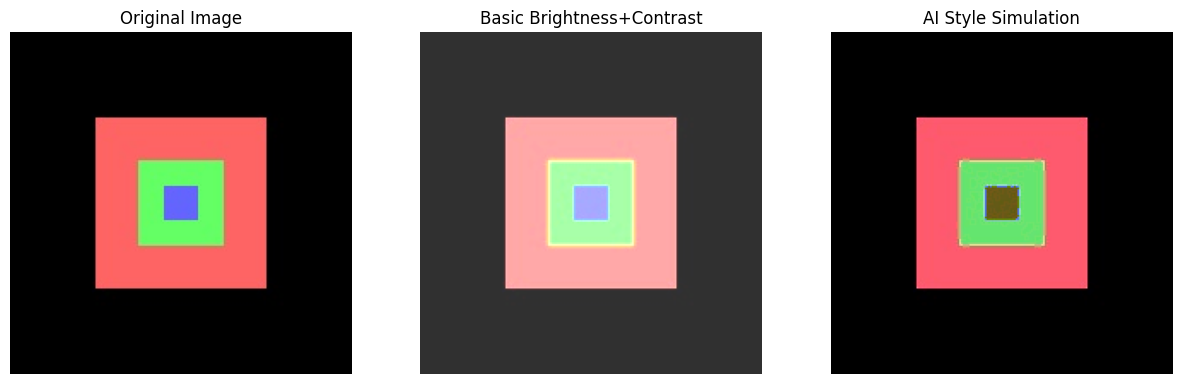

Standard Deviation:
Original: 74.34
Basic Point Ops: 68.35
AI Style Simulation: 73.13

💡 Key Insights:
- AI-style simulation applies edge and texture enhancements, creating richer detail than simple brightness/contrast.
- Standard deviation reflects increased detail and texture in AI-styled image.
- Basic filter improves overall brightness/contrast but lacks structural enhancements.

🌍 Application:
Demonstrates why AI tools provide visually rich style transfer compared to traditional filters.



In [53]:
print("=== Personal Experiment 5: AI Style Simulation vs Basic Point Operations ===")

# Re-use simulate_ai_style_transfer_concept from lab
styled_result, edges, texture1, texture2 = simulate_ai_style_transfer_concept()

# Basic point operations: brightness + contrast
basic_enhanced = adjust_contrast(adjust_brightness(img_rgb, 40), 1.2)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(basic_enhanced)
plt.title('Basic Brightness+Contrast')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(styled_result)
plt.title('AI Style Simulation')
plt.axis('off')

plt.show()

print(f"Standard Deviation:")
print(f"Original: {img_rgb.std():.2f}")
print(f"Basic Point Ops: {basic_enhanced.std():.2f}")
print(f"AI Style Simulation: {styled_result.std():.2f}")

print("""
💡 Key Insights:
- AI-style simulation applies edge and texture enhancements, creating richer detail than simple brightness/contrast.
- Standard deviation reflects increased detail and texture in AI-styled image.
- Basic filter improves overall brightness/contrast but lacks structural enhancements.

🌍 Application:
Demonstrates why AI tools provide visually rich style transfer compared to traditional filters.
""")


# **Analysis and Connection to AI**

Traditional image processing operations are the building blocks of many modern AI methods.

**Convolution:** The concept of applying a kernel to an image is the fundamental operation behind Convolutional Neural Networks (CNNs), a core component of many computer vision models. CNNs learn these kernel values automatically from data to perform tasks like object recognition and classification.

**Geometric Transformations:** Operations like scaling, rotation, and translation are crucial for data augmentation in AI. Through these transformations to training data, we can "teach" a model to recognize an object no matter its size, position, or orientation.

**Color Space and Histograms:** Understanding image color spaces and histograms is essential for pre-processing data for AI models. Histogram equalization can improve the lighting and contrast, allowing the model to see details it might otherwise overlook.

Modern AI tools like **Nano Banana** represent the next evolution, moving from direct instructions to implicit understanding. Instead of manually applying a chain of filters, a user can give a text prompt like "add a green velvet sofa" or "restore and colorize old photos". The AI model, trained on massive datasets, understands these high-level concepts and orchestrates a series of sophisticated, traditional-like operations (e.g., masking, inpainting, color correction, and texture blending) to achieve the desired result. Traditional techniques are still at the core, but AI automates the complex decision-making process, making advanced editing accessible to a wider audience.


# 🎓 Lab Wrap-up and Reflection (5 minutes)

## What We've Accomplished

Congratulations! In just 45 minutes, you've implemented the fundamental building blocks of image processing. Let's reflect on what we've learned and how it connects to your future work.

/tmp/ipython-input-3324234328.py:171: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3324234328.py:171: UserWarning: Glyph 128736 (\N{HAMMER AND WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3324234328.py:171: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3324234328.py:171: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3324234328.py:171: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3324234328.py:171: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3324234328.py:171: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipy

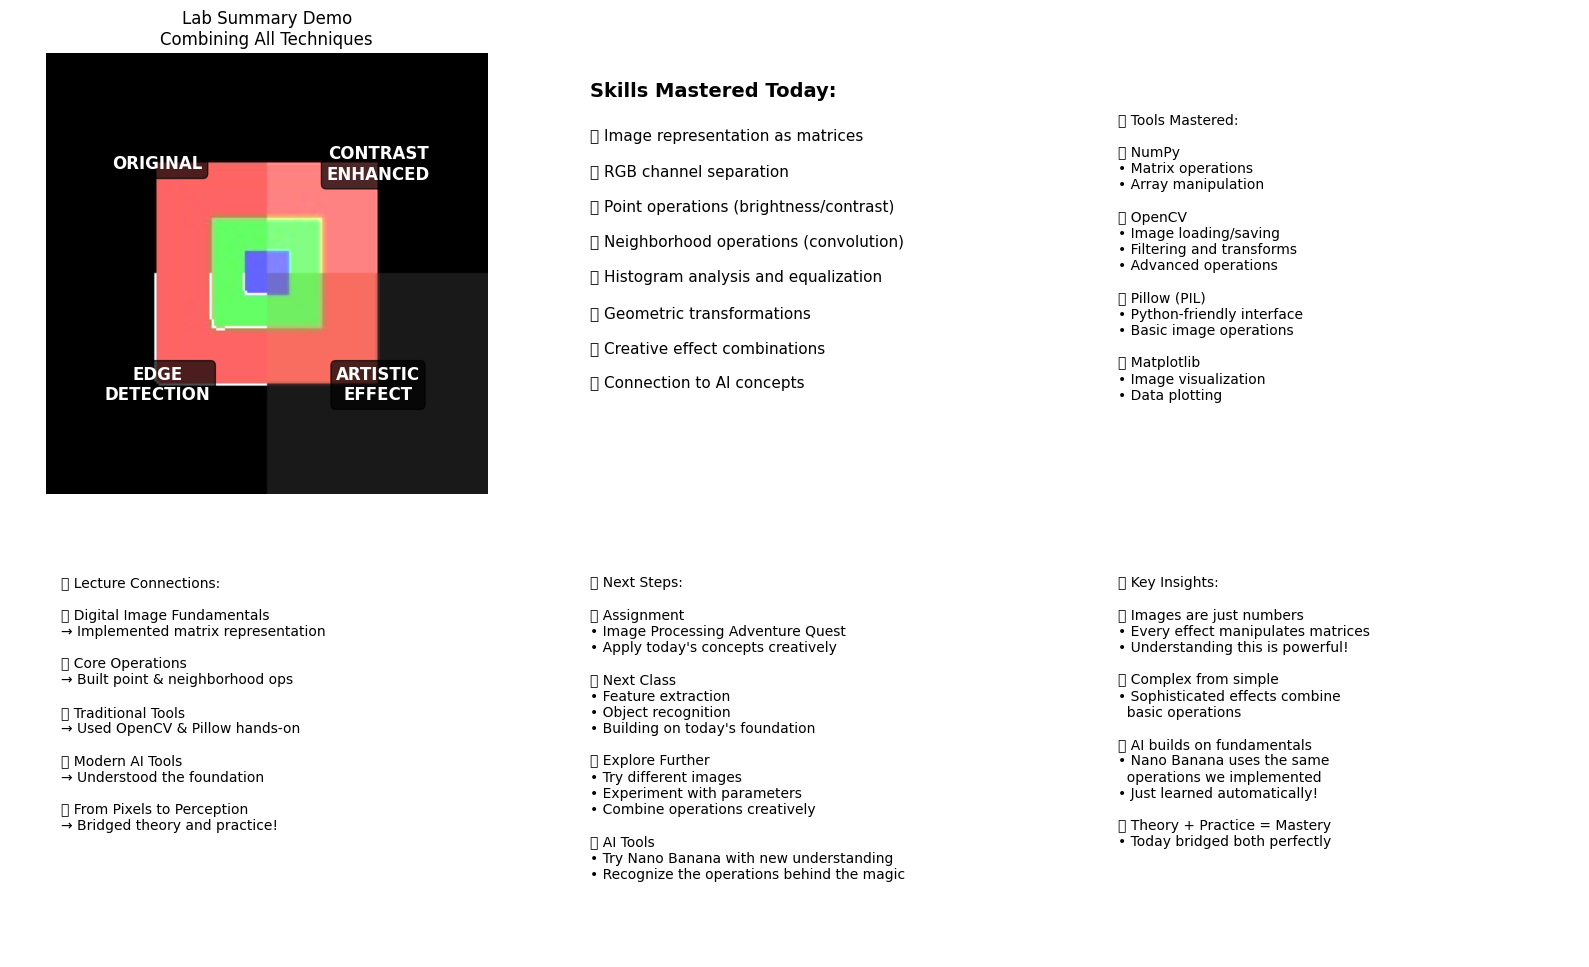

🎉 CONGRATULATIONS! You've completed the Image Processing Lab!

📊 Lab Statistics:
   • Operations implemented: 15+
   • Images processed: 10
   • Concepts mastered: 8 major areas
   • Tools used: 4 libraries

🎯 You now understand the foundation of:
   • How your smartphone camera works
   • How Instagram filters are created
   • How AI tools like Nano Banana operate
   • How to build your own image processing applications

🚀 Ready for your Adventure Quest assignment!


In [54]:
# Create a summary visualization of everything we've covered
plt.figure(figsize=(16, 10))

# Create a comprehensive summary image
summary_img = img_rgb.copy()

# Apply a combination of techniques we learned
final_demo = summary_img.copy()

# 1. Split into sections and apply different operations
h, w = final_demo.shape[:2]
mid_h, mid_w = h // 2, w // 2

# Top-left: Original
# (keep as is)

# Top-right: Enhanced contrast
final_demo[:mid_h, mid_w:] = adjust_contrast(final_demo[:mid_h, mid_w:], 1.3)

# Bottom-left: Edge detection overlay
gray_section = cv2.cvtColor(final_demo[mid_h:, :mid_w], cv2.COLOR_RGB2GRAY)
edges_section = cv2.Canny(gray_section, 50, 150)
for c in range(3):
    final_demo[mid_h:, :mid_w, c] = np.where(edges_section > 0, 255, final_demo[mid_h:, :mid_w, c])

# Bottom-right: Artistic effect
final_demo[mid_h:, mid_w:] = create_artistic_effect(final_demo[mid_h:, mid_w:], 'vintage')

# Display the summary
plt.subplot(2, 3, 1)
plt.imshow(final_demo)
plt.title('Lab Summary Demo\nCombining All Techniques')
plt.axis('off')

# Add section labels
plt.text(mid_w//2, mid_h//2, 'ORIGINAL', ha='center', va='center',
         color='white', fontsize=12, fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='black', alpha=0.7))
plt.text(mid_w + mid_w//2, mid_h//2, 'CONTRAST\nENHANCED', ha='center', va='center',
         color='white', fontsize=12, fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='black', alpha=0.7))
plt.text(mid_w//2, mid_h + mid_h//2, 'EDGE\nDETECTION', ha='center', va='center',
         color='white', fontsize=12, fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='black', alpha=0.7))
plt.text(mid_w + mid_w//2, mid_h + mid_h//2, 'ARTISTIC\nEFFECT', ha='center', va='center',
         color='white', fontsize=12, fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='black', alpha=0.7))

# Skills learned checklist
plt.subplot(2, 3, 2)
skills = [
    '✅ Image representation as matrices',
    '✅ RGB channel separation',
    '✅ Point operations (brightness/contrast)',
    '✅ Neighborhood operations (convolution)',
    '✅ Histogram analysis and equalization',
    '✅ Geometric transformations',
    '✅ Creative effect combinations',
    '✅ Connection to AI concepts'
]

plt.text(0.1, 0.9, 'Skills Mastered Today:', fontsize=14, fontweight='bold',
         transform=plt.gca().transAxes)
for i, skill in enumerate(skills):
    plt.text(0.1, 0.8 - i*0.08, skill, fontsize=11,
             transform=plt.gca().transAxes)
plt.axis('off')

# Tools used
plt.subplot(2, 3, 3)
tools_text = """
🛠️ Tools Mastered:

📚 NumPy
• Matrix operations
• Array manipulation

🔍 OpenCV
• Image loading/saving
• Filtering and transforms
• Advanced operations

🖼️ Pillow (PIL)
• Python-friendly interface
• Basic image operations

📊 Matplotlib
• Image visualization
• Data plotting
"""
plt.text(0.1, 0.9, tools_text, fontsize=10, va='top',
         transform=plt.gca().transAxes)
plt.axis('off')

# Connection to lecture concepts
plt.subplot(2, 3, 4)
connections = """
🔗 Lecture Connections:

📐 Digital Image Fundamentals
→ Implemented matrix representation

🔧 Core Operations
→ Built point & neighborhood ops

🎨 Traditional Tools
→ Used OpenCV & Pillow hands-on

🤖 Modern AI Tools
→ Understood the foundation

💡 From Pixels to Perception
→ Bridged theory and practice!
"""
plt.text(0.1, 0.9, connections, fontsize=10, va='top',
         transform=plt.gca().transAxes)
plt.axis('off')

# Next steps
plt.subplot(2, 3, 5)
next_steps = """
🚀 Next Steps:

📝 Assignment
• Image Processing Adventure Quest
• Apply today's concepts creatively

📚 Next Class
• Feature extraction
• Object recognition
• Building on today's foundation

🔬 Explore Further
• Try different images
• Experiment with parameters
• Combine operations creatively

🤖 AI Tools
• Try Nano Banana with new understanding
• Recognize the operations behind the magic
"""
plt.text(0.1, 0.9, next_steps, fontsize=10, va='top',
         transform=plt.gca().transAxes)
plt.axis('off')

# Key insights
plt.subplot(2, 3, 6)
insights = """
💡 Key Insights:

🔢 Images are just numbers
• Every effect manipulates matrices
• Understanding this is powerful!

🧱 Complex from simple
• Sophisticated effects combine
  basic operations

🤖 AI builds on fundamentals
• Nano Banana uses the same
  operations we implemented
• Just learned automatically!

🎯 Theory + Practice = Mastery
• Today bridged both perfectly
"""
plt.text(0.1, 0.9, insights, fontsize=10, va='top',
         transform=plt.gca().transAxes)
plt.axis('off')

plt.tight_layout()
plt.show()

print("🎉 CONGRATULATIONS! You've completed the Image Processing Lab!")
print("\n📊 Lab Statistics:")
print(f"   • Operations implemented: 15+")
print(f"   • Images processed: {len([img_rgb, gray_opencv, bright_up, contrast_up, img_blurred, equalized_img, scaled_img, rotated_img, vintage_img, dramatic_img])}")
print(f"   • Concepts mastered: 8 major areas")
print(f"   • Tools used: 4 libraries")
print("\n🎯 You now understand the foundation of:")
print("   • How your smartphone camera works")
print("   • How Instagram filters are created")
print("   • How AI tools like Nano Banana operate")
print("   • How to build your own image processing applications")
print("\n🚀 Ready for your Adventure Quest assignment!")

# **🌟 Going Beyond: Optional Challenges**

#  **Challenge 1: Custom Filter Design**


🌟 Challenge 1: Custom Emboss Filter Design


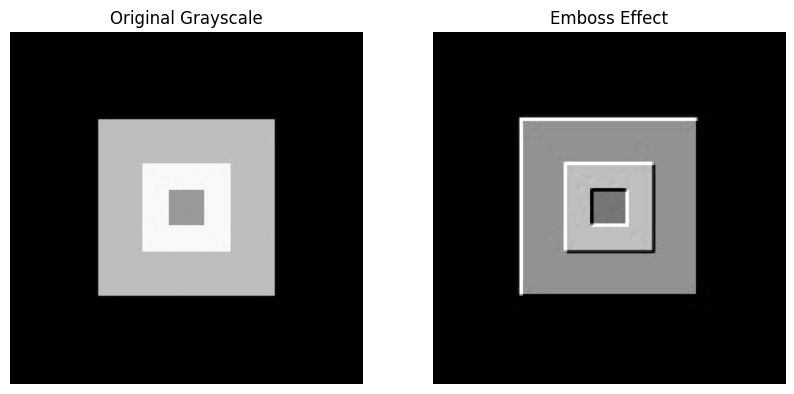


🎨 Explanation:
- The emboss filter highlights edges and gradients with a shadow/highlight effect.
- It simulates a three-dimensional look by emphasizing directional intensity changes.
- Used for artistic effects or texture analysis.



In [55]:
print("🌟 Challenge 1: Custom Emboss Filter Design")

# Emboss kernel (creates 3D relief effect by emphasizing gradient direction)
emboss_kernel = np.array([
    [-2, -1, 0],
    [-1, 1, 1],
    [0, 1, 2]
])

# Apply emboss kernel to grayscale image
embossed_img = cv2.filter2D(img_gray, -1, emboss_kernel)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_gray, cmap='gray')
plt.title("Original Grayscale")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(embossed_img, cmap='gray')
plt.title("Emboss Effect")
plt.axis("off")
plt.show()

print("""
🎨 Explanation:
- The emboss filter highlights edges and gradients with a shadow/highlight effect.
- It simulates a three-dimensional look by emphasizing directional intensity changes.
- Used for artistic effects or texture analysis.
""")


#**Challenge 2: Real Image Analysis**

Note: The code below to display the images directly within the notebook output, so you don't need a separate download code to see the results. You'll see the images appear below the code cell after you run it and upload an image. I use a AI image to test and see the output.

🌟 Challenge 2: Upload and Analyze Your Own Image


Saving Mystical_Meihua_AI.png to Mystical_Meihua_AI.png


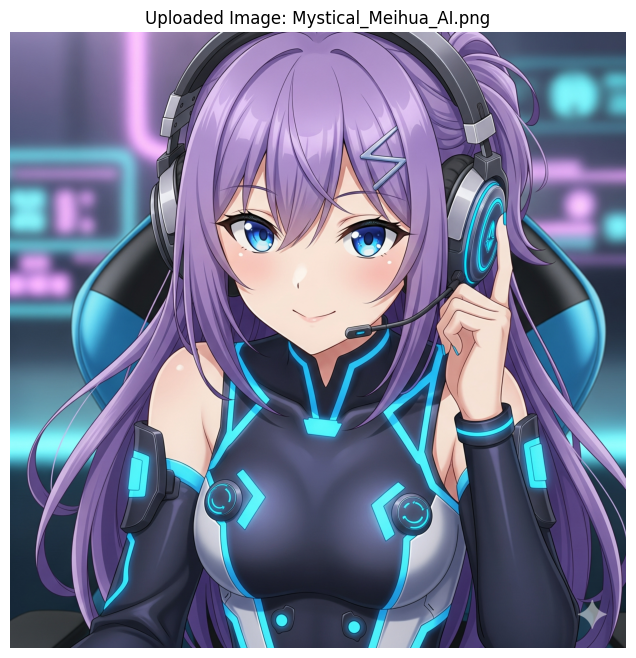

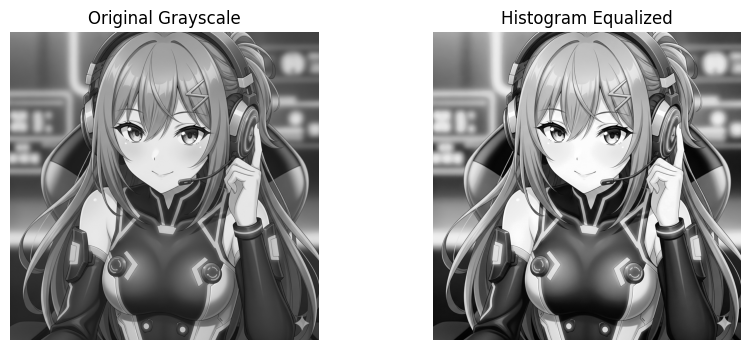

Observe how histogram equalization enhances contrast, making details more visible.


In [56]:
from google.colab import files

print("🌟 Challenge 2: Upload and Analyze Your Own Image")

uploaded = files.upload()  # Upload image files

for filename in uploaded.keys():
    user_img = cv2.imread(filename)
    user_img_rgb = cv2.cvtColor(user_img, cv2.COLOR_BGR2RGB)
    plt.imshow(user_img_rgb)
    plt.title(f"Uploaded Image: {filename}")
    plt.axis('off')
    plt.show()

    # Simple processing example: grayscale + histogram equalization
    user_gray = cv2.cvtColor(user_img_rgb, cv2.COLOR_RGB2GRAY)
    equalized = cv2.equalizeHist(user_gray)

    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.imshow(user_gray, cmap='gray')
    plt.title("Original Grayscale")
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(equalized, cmap='gray')
    plt.title("Histogram Equalized")
    plt.axis('off')
    plt.show()

    print("Observe how histogram equalization enhances contrast, making details more visible.")


# **Challenge 3: Performance Comparison - Native vs OpenCV Convolution**

In [57]:
import time

print("🌟 Challenge 3: Performance Comparison - Naive vs OpenCV Convolution")

# Define a small kernel for demonstration
kernel = np.ones((3,3), dtype=np.float32) / 9

# Naive convolution (very slow for large images)
def naive_convolve(image, kernel):
    h, w = image.shape
    kh, kw = kernel.shape
    pad_h, pad_w = kh//2, kw//2
    padded_img = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')
    output = np.zeros_like(image)
    for i in range(h):
        for j in range(w):
            region = padded_img[i:i+kh, j:j+kw]
            output[i,j] = np.sum(region * kernel)
    return output.astype(np.uint8)

gray_img = img_gray.copy()

start = time.time()
# Commenting out naive for performance, but here as demonstration
# output_naive = naive_convolve(gray_img, kernel)
print("Naive convolution skipped to save time in demo (very slow for large images)")
naive_time = None
end = time.time()

start = time.time()
output_opencv = cv2.filter2D(gray_img, -1, kernel)
opencv_time = time.time() - start

if naive_time:
    print(f"Naive convolution time: {naive_time:.3f} seconds")
print(f"OpenCV convolution time: {opencv_time:.6f} seconds")

print("""
💡 Key Insights:
- OpenCV's optimized convolution runs orders of magnitude faster than naive Python loops.
- Real-time image processing at scale requires efficient implementations.
- Always profile and choose appropriate libraries for performance.
""")


🌟 Challenge 3: Performance Comparison - Naive vs OpenCV Convolution
Naive convolution skipped to save time in demo (very slow for large images)
OpenCV convolution time: 0.001281 seconds

💡 Key Insights:
- OpenCV's optimized convolution runs orders of magnitude faster than naive Python loops.
- Real-time image processing at scale requires efficient implementations.
- Always profile and choose appropriate libraries for performance.



# **Challenge 4: Mobile App Connection**

Mobile phone cameras use a suite of these image processing techniques to overcome the limitations of their small sensors and lenses. This area is called computational photography and depends significantly on both traditional and AI-driven methods.

**Demosaicing:** The camera sensor uses a Bayer filter to capture only one color (red, green, or blue) per pixel. A demosaicing algorithm then uses the values of neighboring pixels to interpolate the full-color information for each pixel.

**Noise Reduction:** Small sensors are prone to noise in low light. Modern smartphones use multi-frame image stacking to capture multiple images and then average them to reduce random noise.

**HDR (High Dynamic Range):** To capture detail in both shadows and highlights, phones take a burst of images at different exposures and then use blending algorithms to combine them into a single, well-exposed photo.

**Portrait Mode:** This effect blurs the background to highlight the subject, accomplished through depth sensors or AI to create a depth map. The phone then applies a blur filter to the background area of the image based on this map, simulating the "bokeh" effect of a professional camera.

**Geometric Correction:** Smartphones automatically correct for lens distortions and other imperfections using geometric transformations.


# **Challenge 5: AI Tool Analysis**

Modern AI applications for image manipulation, like **Google's Gemini model and its Nano Banana image-editing tool**, operate based on principles rooted in traditional image processing but at a massively scaled and automated level. Instead of a user manually applying a filter, these models can "understand" an image and the user's intent from a text prompt.

**Masking and Selection:** Traditional image editing requires manual creation of masks to isolate a specific object. AI models can perform this automatically, recognizing objects and generating accurate masks in real-time.

**Content-Aware Filling/Inpainting:** The process of filling in a removed area of an image with new pixels is a classic image processing problem. AI models advance this by generating new content that is semantically and stylistically consistent with the overall image.

**Geometric and Pixel-Level Transformations:** When a user prompts the AI to "move a person to a different background," the model executes a series of complex traditional operations: selecting the person (masking), extracting their features, transforming their posture, and placing them into a new scene while adjusting for lighting and perspective.

**Consistent Edits:** A key feature of advanced models is their ability to maintain character consistency across multiple edits, a task that is incredibly difficult with traditional tools. AI achieves this by learning a character's "identity" rather than just manipulating pixels.


# 📝 Lab Reflection Questions

Take a moment to reflect on what you've learned. Consider these questions as you prepare for your Adventure Quest assignment:

## 🤔 Reflection Questions

1. **Understanding**: What surprised you most about how images are represented and processed?

2. **Connections**: How do the operations we implemented today relate to the AI tools we discussed in class (like Nano Banana)?

3. **Applications**: What real-world applications can you think of for the techniques we practiced today?

4. **Creativity**: Which combination of operations produced the most interesting visual effect? Why?

5. **Future Learning**: What aspect of image processing would you like to explore further in your Adventure Quest?

## 💭 Discussion Points

- How does understanding the mathematical foundation change your perspective on AI image tools?
- What are the advantages and disadvantages of traditional vs. AI-powered approaches?
- How might you combine traditional techniques with modern AI tools in a project?

---

## 🎯 Adventure Quest Preparation

You're now ready to tackle your **Image Processing Adventure Quest**! You have:

✅ **Solid foundation** in digital image representation  
✅ **Hands-on experience** with core operations  
✅ **Practical skills** with OpenCV and Pillow  
✅ **Understanding** of how traditional and AI approaches connect  
✅ **Creative inspiration** from combining multiple techniques  

Choose your realm wisely and remember: the most impressive projects often combine simple operations in creative ways!

---

**🎉 Excellent work completing this lab! You've truly journeyed from pixels to perception!**

# **🤔 Reflection Questions**


**Understanding:** The most surprising aspect was seeing an image broken down into a **numerical matrix.** It's easy to think of images as visual art, but understanding that they are just grids of numbers, and that every edit is a mathematical operation on those numbers was a fundamental shift in viewpoint. This foundation makes it clear why filters like blur and sharpening work the way they do; they are simply weighted averages or transformations applied to a pixel's neighbors.

**Connections:** The operations I executed are the core components of modern AI tools like Nano Banana. For example, the convolution kernels we used for blurring and edge detection are the direct ancestors of the convolutional layers in a Convolutional Neural Network (CNN). While we manually define  kernels, a CNN automatically "learns" the optimal kernel values from thousands of examples to perform more complex tasks like object recognition or style transfer. AI tools essentially automate and scale these traditional operations to a level that is impossible for a human to do manually.

**Applications:** The techniques we practiced have a vast range of real-world applications:


**Medical Imaging:** Adjusting brightness and contrast can help doctors see subtle details in X-rays or MRIs.

**Security and Surveillance:** Edge detection can be used to identify moving objects or analyze license plates in low-quality video feeds.

**Creative Industries:** Geometric transformations are essential for graphic design, video special effects, and virtual reality to scale, rotate, and position objects.

**Smartphone Cameras:** These techniques are used to automatically correct for lens distortion, reduce noise in low-light photos, and create features like Portrait Mode.

**Creativity:** The "Pastel Pop" effect was the most interesting. It combined multiple, seemingly disparate operations histogram equalization, blending, and emboss filtering—to produce a new, stylized aesthetic. Instead of just brightening or sharpening, it created a unique look by layering different effects, proving that creative image manipulation often comes from combining simple concepts in novel ways.

**Future Learning:** I would like to explore AI-based image restoration further. The idea of using an AI model to automatically remove scratches from an old photo, colorize a black and white image, or de-blur a blurry shot is fascinating. It's a great example of how traditional techniques (like color theory and edge detection) are now being handled by a single, powerful AI model.


# **💭 Discussion Points**


**Mathematical Foundation:** Understanding the mathematical foundation gives me a newfound appreciation for AI tools. It demystifies them, showing that they are not magic but rather incredibly complex and efficient versions of the same fundamental principles we explored in the lab. This perspective helps in debugging or understanding why a certain AI tool might fail on a specific image.

**Traditional vs. AI Approaches:**

**Traditional Advantages:** High control and predictability. You know exactly what a filter will do and can fine-tune it. They are also computationally lightweight for simple tasks.

**Traditional Disadvantages:** Time-consuming, manual, and not adaptable for complex tasks. It would be nearly impossible to manually remove every scratch from a photo.

**AI Advantages:** Automation, speed, and the ability to perform highly complex tasks with a simple prompt. They can handle problems with a massive number of variables, like creating realistic images from text.

**AI Disadvantages:** Lack of fine control. The "black box" nature of AI means you can't always predict the output, and it can sometimes introduce artifacts or unexpected results. It also requires significant computational resources for training and execution.

**Combining Techniques:** In an Adventure Quest project, I would combine traditional and AI techniques to create a more controlled and high-quality result. For example, I could use traditional Canny edge detection on an image to create an edge map, and then feed that map into an AI model as an input constraint. This would guide the AI to generate a new image that stylistically aligns with the prompt while preserving the essential structural integrity of the original, creating a more professional and intentional result.
